<h1 style = 'text-align: center;'>Tuwaiq Academy</h1>
<h1 style = 'text-align: center;'>Data Science and Machine Learning Bootcamp</h1>
<h2 style = 'text-align: center;'>Usecase 3 - Project 2: World University Rankings</h2>

In [285]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import re
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
# Shanghai University Rank 2022 - 2023
shanghai_university_rank22=pd.read_excel("Data/shanghai Ranking.xlsx") # 2022
shanghai_university_rank23=pd.read_csv("Data/shanghai-ranking_2023.csv") # 2023

# Times Higher Education University Rank 2022 - 2023
TimesHigherEducation_university_rank22=pd.read_csv("Data/THE2022.csv") # 2022
TimesHigherEducation_university_rank23=pd.read_csv("Data/THE2023.csv") # 2023

# Center for World University Rank 2022 - 2023
WordRank_university_rank22=pd.read_csv("Data/WORLD UNIVERSITY RANKINGS.csv") # 2022
WordRank_university_rank23=pd.read_excel("Data/Word Rank University.xlsx") # 2023


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

### Shape 2022

In [3]:
shanghai_university_rank22.shape, TimesHigherEducation_university_rank22.shape, WordRank_university_rank22.shape

((1000, 6), (2112, 24), (2000, 9))

### Shape 2023

In [4]:
shanghai_university_rank23.shape ,TimesHigherEducation_university_rank23.shape ,WordRank_university_rank23.shape

((1000, 19), (2345, 24), (2000, 9))

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

### shanghai_university_rank 22 - 23

In [5]:
shanghai_university_rank22.head()
# National/Regional Rank: It's based on the county 
# Ranking : It's based on the globle

# 1. Did this dataset is up to date or there is sepcifie period ?
# 2. How to use this dataset to ans the main Q in define problem statment ?

Ranking                              University Name National/Regional Rank  \
0       1                           Harvard University                      1   
1       2                          Stanford University                      2   
2       3  Massachusetts Institute of Technology (MIT)                      3   
3       4                      University of Cambridge                      1   
4       5           University of California, Berkeley                      4   

   Total Score                                               LOGO  \
0        100.0  http://www.shanghairanking.com/_uni/logo/032bd...   
1         76.8  http://www.shanghairanking.com/_uni/logo/13de8...   
2         70.1  http://www.shanghairanking.com/_uni/logo/79165...   
3         69.6  http://www.shanghairanking.com/_uni/logo/8d986...   
4         65.3  http://www.shanghairanking.com/_uni/logo/0ff17...   

                                  University Detail   
0  http://www.shanghairanking.com/institution/har...  
1  http://www.shanghairanking.com/institution/sta...  
2  http://www.shanghairanking.com/institution/mas...  
3  http://www.shanghairanking.com/institution/uni...  
4  http://www.shanghairanking.com/institution/uni...

In [6]:
shanghai_university_rank23.head()

Rank                                               Logo  \
0    1  https://www.shanghairanking.com/_uni/logo/032b...   
1    2  https://www.shanghairanking.com/_uni/logo/13de...   
2    3  https://www.shanghairanking.com/_uni/logo/7916...   
3    4  https://www.shanghairanking.com/_uni/logo/8d98...   
4    5  https://www.shanghairanking.com/_uni/logo/0ff1...   

                                          Name  \
0                           Harvard University   
1                          Stanford University   
2  Massachusetts Institute of Technology (MIT)   
3                      University of Cambridge   
4           University of California, Berkeley   

                                                Link  \
0  https://www.shanghairanking.com/institution/ha...   
1  https://www.shanghairanking.com/institution/st...   
2  https://www.shanghairanking.com/institution/ma...   
3  https://www.shanghairanking.com/institution/un...   
4  https://www.shanghairanking.com/institution/un...   

                    Website  \
0    http://www.harvard.edu   
1   http://www.stanford.edu   
2       http://web.mit.edu/   
3      http://www.cam.ac.uk   
4      http://berkeley.edu/   

                                                Flag          Country  \
0  https://www.shanghairanking.com/_pub/country-f...    United States   
1  https://www.shanghairanking.com/_pub/country-f...    United States   
2  https://www.shanghairanking.com/_pub/country-f...    United States   
3  https://www.shanghairanking.com/_pub/country-f...   United Kingdom   
4  https://www.shanghairanking.com/_pub/country-f...    United States   

          Region  Foundation_year  \
0  North America             1636   
1  North America             1885   
2  North America             1861   
3         Europe             1318   
4  North America             1868   

                                             Address  \
0   Harvard University, Cambridge, Massachusetts ...   
1                                     450 Serra Mall   
2                            77 Massachusetts Avenue   
3                      The Old Schools, Trinity Lane   
4   University of California, Berkeley, Berkeley,...   

                                               Intro  Total_Enrollment  \
0  Harvard University is devoted to excellence in...             41987   
1  Stanford University is a research university t...             16163   
2  The essence of MIT is our appetite for problem...             11084   
3  The University of Cambridge’s mission is to co...             19875   
4  Berkeley is internationally noted for its acad...             39874   

   Total_International_Enrollment  UG_Enrollment  International_UG_Enrollment  \
0                            24.0          14467                         10.1   
1                            24.0           6994                         10.7   
2                            16.8           4276                         14.5   
3                            36.9          12265                         23.3   
4                            17.7          29250                         19.0   

   PG_Enrollment  International_PG_Enrollment   latitude   longitude  
0          27520                         20.1  42.367909  -71.126782  
1           9169                         34.2  37.431314 -122.169365  
2           6808                         18.2  42.358253  -71.096627  
3           7610                         58.9  52.210946    0.092005  
4          10624                         13.9  37.875500 -122.239069

## TimesHigherEducation_university_rank 22 - 23

In [7]:
TimesHigherEducation_university_rank22.head(20)
# rank_order: The order of the university based on its overall rank.
# rank: The overall ranking position of the university.
# name: The name of the university.
# scores_overall: The overall score assigned to the university based on various metrics.
# scores_overall_rank: The rank of the university based on its overall score.
# scores_teaching: The score reflecting the quality of teaching at the university.
# scores_teaching_rank: The rank of the university based on its teaching score.
# scores_research: The score reflecting the quality and quantity of research output.
# scores_research_rank: The rank of the university based on its research score.
# scores_citations: The score based on the number of citations of research papers produced by the university.
# scores_citations_rank: The rank of the university based on its citations score.
# scores_industry_income: The score reflecting the university's ability to generate income from industry.
# scores_industry_income_rank: The rank based on the industry income score.
# scores_international_outlook: The score representing the university's international diversity and collaboration.
# scores_international_outlook_rank: The rank based on the international outlook score.
# location: The geographical location of the university.
# stats_number_students: The total number of students enrolled at the university.
# stats_student_staff_ratio: The ratio of students to academic staff at the university.
# stats_pc_intl_students: The percentage of international students enrolled.
# stats_female_male_ratio: The ratio of female to male students at the university.
# aliases: Any alternative names or abbreviations for the university.
# subjects_offered: The academic subjects or programs available at the university.
# closed: Indicates whether the university is closed.
# unaccredited: Indicates whether the university is unaccredited.


rank_order rank                                   name scores_overall  \
0           10    1                   University of Oxford           95.7   
1           20   =2     California Institute of Technology           95.0   
2           30   =2                     Harvard University           95.0   
3           40    4                    Stanford University           94.9   
4           50   =5                University of Cambridge           94.6   
5           60   =5  Massachusetts Institute of Technology           94.6   
6           70    7                   Princeton University           93.6   
7           80    8     University of California, Berkeley           92.2   
8           90    9                        Yale University           90.8   
9          100   10              The University of Chicago           89.8   
10         110   11                    Columbia University           89.6   
11         120   12                Imperial College London           89.3   
12         130  =13               Johns Hopkins University           88.4   
13         140  =13             University of Pennsylvania           88.4   
14         150   15                             ETH Zurich           88.2   
15         160  =16                      Peking University           87.5   
16         170  =16                    Tsinghua University           87.5   
17         180  =18                  University of Toronto           87.2   
18         190  =18                                    UCL           87.2   
19         200   20  University of California, Los Angeles           86.7   

    scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                    10             91.0                     5   
1                    20             93.6                     2   
2                    30             94.5                     1   
3                    40             92.3                     3   
4                    50             90.9                     6   
5                    60             90.9                     7   
6                    70             89.5                     9   
7                    80             85.7                    14   
8                    90             90.7                     8   
9                   100             87.2                    12   
10                  110             87.8                    11   
11                  120             81.4                    17   
12                  130             80.0                    20   
13                  140             84.5                    15   
14                  150             81.3                    18   
15                  160             91.4                     4   
16                  170             88.1                    10   
17                  180             77.6                    25   
18                  190             76.8                    26   
19                  200             82.1                    16   

    scores_research  scores_research_rank  scores_citations  ...  \
0              99.6                     1              98.0  ...   
1              96.9                     4              97.8  ...   
2              98.9                     3              99.2  ...   
3              96.8                     5              99.9  ...   
4              99.5                     2              96.2  ...   
5              94.4                    10              99.7  ...   
6              96.0                     7              99.0  ...   
7              96.0                     6              99.1  ...   
8              93.0                    12              97.0  ...   
9              90.6                    15              98.3  ...   
10             89.6                    19              97.3  ...   
11             88.3                    22              97.6  ...   
12             90.8                    14              97.2  ...   
13             89.2                    20      

In [8]:
TimesHigherEducation_university_rank22[TimesHigherEducation_university_rank22['scores_overall_rank'].duplicated(keep= False)]

rank_order     rank                   name scores_overall  \
553        5540  501–600     Lincoln University      38.1–40.8   
554        5540  501–600  University of Lincoln      38.1–40.8   

     scores_overall_rank  scores_teaching  scores_teaching_rank  \
553                 5540             26.6                   622   
554                 5540             17.2                  1408   

     scores_research  scores_research_rank  scores_citations  ...  \
553             22.5                   595              51.6  ...   
554             16.0                   885              79.9  ...   

     scores_international_outlook_rank        location  stats_number_students  \
553                                 28     New Zealand                  2,633   
554                                276  United Kingdom                 13,925   

     stats_student_staff_ratio  stats_pc_intl_students  \
553                       14.7                     47%   
554                       15.4                     12%   

    stats_female_male_ratio                aliases  \
553                 51 : 49     Lincoln University   
554                 56 : 44  University of Lincoln   

                                      subjects_offered closed unaccredited  
553  Sport Science,Accounting & Finance,Economics &...  False        False  
554  Mechanical & Aerospace Engineering,Veterinary ...  False        False  

[2 rows x 24 columns]

In [9]:
TimesHigherEducation_university_rank22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2112 non-null   int64  
 1   rank                               2112 non-null   object 
 2   name                               2112 non-null   object 
 3   scores_overall                     1662 non-null   object 
 4   scores_overall_rank                2112 non-null   int64  
 5   scores_teaching                    1662 non-null   float64
 6   scores_teaching_rank               2112 non-null   int64  
 7   scores_research                    1662 non-null   float64
 8   scores_research_rank               2112 non-null   int64  
 9   scores_citations                   1662 non-null   float64
 10  scores_citations_rank              2112 non-null   int64  
 11  scores_industry_income             1662 non-null   float

In [10]:
#TimesHigherEducation_university_rank["sdg-score-multi__number 6"].value_counts()

In [11]:
TimesHigherEducation_university_rank23.head(15)
# rank order is like index start with 1 + 0 >> 10, 20 , 30 and we will consider it as index in mean time.

rank_order rank                                   name scores_overall  \
0           10    1                   University of Oxford           96.4   
1           20    2                     Harvard University           95.2   
2           30   =3                University of Cambridge           94.8   
3           40   =3                    Stanford University           94.8   
4           50    5  Massachusetts Institute of Technology           94.2   
5           60    6     California Institute of Technology           94.1   
6           70    7                   Princeton University           92.4   
7           80    8     University of California, Berkeley           92.1   
8           90    9                        Yale University           91.4   
9          100   10                Imperial College London           90.4   
10         110  =11                    Columbia University           89.4   
11         120  =11                             ETH Zurich           89.4   
12         130   13              The University of Chicago           88.9   
13         140   14             University of Pennsylvania           88.8   
14         150   15               Johns Hopkins University           88.3   

    scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                    10             92.3                     5   
1                    20             94.8                     1   
2                    30             90.9                     7   
3                    40             94.2                     2   
4                    50             90.7                     8   
5                    60             90.9                     6   
6                    70             87.6                    12   
7                    80             86.4                    14   
8                    90             92.6                     3   
9                   100             82.8                    16   
10                  110             89.4                    10   
11                  120             82.6                    17   
12                  130             86.5                    13   
13                  140             86.0                    15   
14                  150             79.4                    21   

    scores_research  scores_research_rank  scores_citations  ...  \
0              99.7                     1              99.0  ...   
1              99.0                     3              99.3  ...   
2              99.5                     2              97.0  ...   
3              96.7                     7              99.8  ...   
4              93.6                    11              99.8  ...   
5              97.0                     5              97.3  ...   
6              95.9                     8              99.1  ...   
7              95.8                     9              99.0  ...   
8              92.7                    14              97.0  ...   
9              90.8                    17              98.3  ...   
10             87.7                    21              97.1  ...   
11             95.4                    10              90.7  ...   
12             88.8                    19              97.7  ...   
13             88.8                    20              97.0  ...   
14             91.5                    15              97.0  ...   

    scores_international_outlook_rank        location  stats_number_students  \
0                                  28  United Kingdom                 20,965   
1                                 214   United States                 21,887   
2                                  34  United Kingdom                 20,185   
3                                 223   United States                 16,164   
4                                 119   United States                 11,415   
5                                 176   United States                  2,237   
6                                 215   United States            

In [12]:
TimesHigherEducation_university_rank23[TimesHigherEducation_university_rank23['scores_overall_rank'].duplicated(keep= False)]

rank_order      rank                                               name  \
450         4510   401–500                                 Lincoln University   
451         4510   401–500                              University of Lincoln   
1804     1000006  Reporter                                Aga Khan University   
1805     1000006  Reporter                            Afe Babalola University   
1811     1000012  Reporter                                   Ajman University   
1812     1000012  Reporter                       Akita Prefectural University   
1816     1000016  Reporter                       Al-Farabi University College   
1817     1000016  Reporter                        Al Ahliyya Amman University   
1819     1000018  Reporter                         University of Al-Hamdaniya   
1820     1000018  Reporter                        Al-Esraa University College   
1848     1000046  Reporter                          Antonio Nariño University   
1849     1000046  Reporter                      University of the Arts London   
1892     1000089  Reporter                     Universidad Católica de Cuenca   
1893     1000089  Reporter  B. S. Abdur Rahman Crescent Institute of Scien...   
1915     1000111  Reporter                   University for the Creative Arts   
1916     1000111  Reporter                           Cihan University – Erbil   
1917     1000112  Reporter  City University of Science and Information Tec...   
1918     1000112  Reporter               Cross River University of Technology   
1934     1000128  Reporter   Denau Institute of Entrepreneurship and Pedagogy   
1935     1000128  Reporter                                   Doğuş University   
1940     1000133  Reporter                               DHA Suffa University   
1941     1000133  Reporter                                University of Duhok   
1979     1000171  Reporter                              Glasgow School of Art   
1980     1000171  Reporter                      Fergana Polytechnic Institute   
2045     1000236  Reporter                                  Khazar University   
2046     1000236  Reporter                               Kadir Has University   
2066     1000256  Reporter                               Knowledge University   
2067     1000256  Reporter                              University of Lampung   
2074     1000263  Reporter           Lesya Ukrainka Volyn National University   
2075     1000263  Reporter                                    Koya University   
2231     1000419  Reporter                  Shri Mata Vaishno Devi University   
2232     1000419  Reporter                 Samarkand State Medical University   
2273     1000460  Reporter                   Tashkent State University of Law   
2274     1000460  Reporter                   Université Sultan Moulay Slimane   
2290     1000476  Reporter                 Tomsk State Pedagogical University   
2291     1000476  Reporter             Tashkent State University of Economics   
2303     1000488  Reporter                                             UNNOBA   
2304     1000488  Reporter  Institute of Telecommunications and Informatic...   
2330     1000514  Reporter                       Uzhhorod National University   
2331     1000514  Reporter                            University of Worcester   

     scores_overall  scores_overall_rank  scores_teaching  \
450       42.1–44.9                 4510             29.7   
451       42.1–44.9                 4510             17.8   
1804            NaN              1000006              NaN   
1805            NaN              1000006              NaN   
1811            NaN              1000012              NaN   
1812            NaN              1000012              NaN   
1816            NaN              1000016              NaN   
1817            NaN              1000016              NaN   
1819            NaN              1000018              NaN   
1820            NaN              1000018              NaN   
1848         

In [13]:
TimesHigherEducation_university_rank23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2345 non-null   int64  
 1   rank                               2345 non-null   object 
 2   name                               2345 non-null   object 
 3   scores_overall                     1799 non-null   object 
 4   scores_overall_rank                2345 non-null   int64  
 5   scores_teaching                    1799 non-null   float64
 6   scores_teaching_rank               2345 non-null   int64  
 7   scores_research                    1799 non-null   float64
 8   scores_research_rank               2345 non-null   int64  
 9   scores_citations                   1799 non-null   float64
 10  scores_citations_rank              2345 non-null   int64  
 11  scores_industry_income             1799 non-null   float

In [14]:
WordRank_university_rank22.tail()
#Institution: Univesity name
#National Rank:The university's ranking within its own country.
#Educational Rank:This rank reflects the quality of education provided by the university, based on various metrics.
#Employability Rank	:The university's ranking based on the employability of its graduates, often influenced by industry connections and job placement rates.
#Faculty Rank:Ranking based on the qualifications and achievements of the university's faculty members.
#Research Rank:This rank indicates the university's research output and impact, including publications and citations.
#Score:The overall score assigned to the university, typically ranging from 0 to 100, reflecting its performance across various metrics.

World Rank                                        Institution Location  \
1995        1996                           Bharathidasan University    India   
1996        1997                     Federal University of Maranhão   Brazil   
1997        1998        Jiangxi University of Finance and Economics    China   
1998        1999                             University of Tarapacá    Chile   
1999        2000  National Institute of Mental Health and Neuros...    India   

      National Rank Education Rank Employability Rank Faculty Rank  \
1995             66              -                  -            -   
1996             56              -                  -            -   
1997            302              -                797            -   
1998             16              -                  -            -   
1999             67              -                  -            -   

     Research Rank  Score  
1995          1921   65.8  
1996          1923   65.7  
1997          1948   65.7  
1998          1925   65.7  
1999          1926   65.7

In [15]:
WordRank_university_rank23.tail()
#National Rank:The university's ranking within its own country.
#Educational Rank:This rank reflects the quality of education provided by the university, based on various metrics.
#Employability Rank	:The university's ranking based on the employability of its graduates, often influenced by industry connections and job placement rates.
#Faculty Rank:Ranking based on the qualifications and achievements of the university's faculty members.
#Research Rank:This rank indicates the university's research output and impact, including publications and citations.
#Score:The overall score assigned to the university, typically ranging from 0 to 100, reflecting its performance across various metrics.

World Rank                       University Names Location   \
1995  1996Top 9.8%          Chongqing Jiaotong University     China   
1996  1997Top 9.8%  University of Arkansas at Little Rock       USA   
1997  1998Top 9.8%             Van Yüzüncü Yıl University    Turkey   
1998  1999Top 9.8%               Bharathidasan University     India   
1999  2000Top 9.8%             Gebze Technical University    Turkey   

      National Rank Educational Rank Employability Rank Faculty Rank  \
1995            314                -                  -            -   
1996            332                -               1322            -   
1997             54                -                  -            -   
1998             64                -                  -            -   
1999             55                -                  -            -   

     Research Rank  Score  
1995          1917   66.0  
1996          1920   66.0  
1997          1919   66.0  
1998          1922   66.0  
1999          1923   66.0

### Based on the previous codes, it shows that there are some differences between the data frames, such as the number of columns, column names, and some extra or missing columns.

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [16]:
# The Datasets trustworth as we check from the All Sources Such as THE, CWUR, ARWU

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [17]:
# ----

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [18]:
# Check the name of WordRank_university_rank23["University Names"]
WordRank_university_rank23["University Names"][0]

'Harvard University\n  CWUR Rating System: \xa0 Education: A+; Employability: A+; Faculty: A+; Research: A+'

In [19]:
# Check the name of WordRank_university_rank23["University Names"]
WordRank_university_rank22["Institution"][0]

'Harvard University'

In [20]:
# Change the name to be consistent with same in diff Dataset WordRank_university_rank22
WordRank_university_rank23["University Names"] = WordRank_university_rank23["University Names"].map(lambda x : x.split("\n")[0])

In [21]:
WordRank_university_rank23["University Names"][0]

'Harvard University'

In [22]:
# All other Datasets is consistents and also all columns realted to each other

In [251]:
# Create a mapping of university names to country from the 2023 dataset
name_to_country = shanghai_university_rank23.set_index('Name')['Country'].to_dict()

# Add the "Country" column to the 2022 dataset by mapping university names
shanghai_university_rank22['Country'] = shanghai_university_rank22['University Name'].map(name_to_country)

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [23]:
# The sample appropriateness is good, meaning our data aligns well with the objectives of our analysis.

### shanghai_university_rank 22 - 23

In [24]:
shanghai_university_rank22.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'LOGO', 'University Detail '],
      dtype='object')

In [25]:
shanghai_university_rank23['Link'][0]

'https://www.shanghairanking.com/institution/harvard-university'

In [26]:
shanghai_university_rank23.columns

Index(['Rank', 'Logo', 'Name', 'Link', 'Website', 'Flag', 'Country', 'Region',
       'Foundation_year', 'Address', 'Intro', 'Total_Enrollment',
       'Total_International_Enrollment', 'UG_Enrollment',
       'International_UG_Enrollment', 'PG_Enrollment',
       'International_PG_Enrollment', 'latitude', 'longitude'],
      dtype='object')

In [27]:
shanghai_university_rank23.drop(columns=[
     'Website', 'Flag',
    'Foundation_year', 'Address', 'Intro',
     'latitude', 'longitude'
], inplace = True)


In [28]:
shanghai_university_rank22.head()

Ranking                              University Name National/Regional Rank  \
0       1                           Harvard University                      1   
1       2                          Stanford University                      2   
2       3  Massachusetts Institute of Technology (MIT)                      3   
3       4                      University of Cambridge                      1   
4       5           University of California, Berkeley                      4   

   Total Score                                               LOGO  \
0        100.0  http://www.shanghairanking.com/_uni/logo/032bd...   
1         76.8  http://www.shanghairanking.com/_uni/logo/13de8...   
2         70.1  http://www.shanghairanking.com/_uni/logo/79165...   
3         69.6  http://www.shanghairanking.com/_uni/logo/8d986...   
4         65.3  http://www.shanghairanking.com/_uni/logo/0ff17...   

                                  University Detail   
0  http://www.shanghairanking.com/institution/har...  
1  http://www.shanghairanking.com/institution/sta...  
2  http://www.shanghairanking.com/institution/mas...  
3  http://www.shanghairanking.com/institution/uni...  
4  http://www.shanghairanking.com/institution/uni...

In [29]:
shanghai_university_rank23.head()

Rank                                               Logo  \
0    1  https://www.shanghairanking.com/_uni/logo/032b...   
1    2  https://www.shanghairanking.com/_uni/logo/13de...   
2    3  https://www.shanghairanking.com/_uni/logo/7916...   
3    4  https://www.shanghairanking.com/_uni/logo/8d98...   
4    5  https://www.shanghairanking.com/_uni/logo/0ff1...   

                                          Name  \
0                           Harvard University   
1                          Stanford University   
2  Massachusetts Institute of Technology (MIT)   
3                      University of Cambridge   
4           University of California, Berkeley   

                                                Link          Country  \
0  https://www.shanghairanking.com/institution/ha...    United States   
1  https://www.shanghairanking.com/institution/st...    United States   
2  https://www.shanghairanking.com/institution/ma...    United States   
3  https://www.shanghairanking.com/institution/un...   United Kingdom   
4  https://www.shanghairanking.com/institution/un...    United States   

          Region  Total_Enrollment  Total_International_Enrollment  \
0  North America             41987                            24.0   
1  North America             16163                            24.0   
2  North America             11084                            16.8   
3         Europe             19875                            36.9   
4  North America             39874                            17.7   

   UG_Enrollment  International_UG_Enrollment  PG_Enrollment  \
0          14467                         10.1          27520   
1           6994                         10.7           9169   
2           4276                         14.5           6808   
3          12265                         23.3           7610   
4          29250                         19.0          10624   

   International_PG_Enrollment  
0                         20.1  
1                         34.2  
2                         18.2  
3                         58.9  
4                         13.9

## TimesHigherEducation_university_rank 22 - 23

In [30]:
TimesHigherEducation_university_rank22.head(1)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           95.7                   10   

   scores_teaching  scores_teaching_rank  scores_research  \
0             91.0                     5             99.6   

   scores_research_rank  scores_citations  ...  \
0                     1              98.0  ...   

   scores_international_outlook_rank        location  stats_number_students  \
0                                 26  United Kingdom                 20,835   

   stats_student_staff_ratio  stats_pc_intl_students stats_female_male_ratio  \
0                       10.7                     42%                 47 : 53   

                aliases                                   subjects_offered  \
0  University of Oxford  Accounting & Finance,General Engineering,Commu...   

  closed unaccredited  
0  False        False  

[1 rows x 24 columns]

In [31]:
TimesHigherEducation_university_rank22.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'location', 'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited'],
      dtype='object')

In [32]:
TimesHigherEducation_university_rank22.drop(columns=['unaccredited', 'closed', 'aliases'], inplace = True)

In [33]:
TimesHigherEducation_university_rank22.drop(columns=['subjects_offered'], inplace = True)

In [34]:
TimesHigherEducation_university_rank22.head(1)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           95.7                   10   

   scores_teaching  scores_teaching_rank  scores_research  \
0             91.0                     5             99.6   

   scores_research_rank  scores_citations  scores_citations_rank  \
0                     1              98.0                     40   

   scores_industry_income  scores_industry_income_rank  \
0                    74.4                          161   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.3                                 26   

         location stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                20,835                       10.7   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 47 : 53

In [35]:
TimesHigherEducation_university_rank23.head(1)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           96.4                   10   

   scores_teaching  scores_teaching_rank  scores_research  \
0             92.3                     5             99.7   

   scores_research_rank  scores_citations  ...  \
0                     1              99.0  ...   

   scores_international_outlook_rank        location  stats_number_students  \
0                                 28  United Kingdom                 20,965   

   stats_student_staff_ratio  stats_pc_intl_students stats_female_male_ratio  \
0                       10.6                     42%                 48 : 52   

                aliases                                   subjects_offered  \
0  University of Oxford  Accounting & Finance,General Engineering,Commu...   

  closed unaccredited  
0  False        False  

[1 rows x 24 columns]

In [36]:
TimesHigherEducation_university_rank23.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'location', 'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited'],
      dtype='object')

In [37]:
TimesHigherEducation_university_rank23.drop(columns=['unaccredited', 'closed', 'aliases', 'subjects_offered'], inplace = True)

In [38]:
TimesHigherEducation_university_rank23.head(1)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           96.4                   10   

   scores_teaching  scores_teaching_rank  scores_research  \
0             92.3                     5             99.7   

   scores_research_rank  scores_citations  scores_citations_rank  \
0                     1              99.0                     28   

   scores_industry_income  scores_industry_income_rank  \
0                    74.9                          158   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.2                                 28   

         location stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                20,965                       10.6   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 48 : 52

## WordRank_university_rank 22 - 23

In [39]:
WordRank_university_rank22.head(2)

World Rank                            Institution Location  National Rank  \
0           1                     Harvard University      USA              1   
1           2  Massachusetts Institute of Technology      USA              2   

  Education Rank Employability Rank Faculty Rank Research Rank  Score  
0              1                  1            1             1  100.0  
1              4                 12            2             7   96.7

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


## shanghai_university_rank

In [40]:
shanghai_university_rank22.head()

Ranking                              University Name National/Regional Rank  \
0       1                           Harvard University                      1   
1       2                          Stanford University                      2   
2       3  Massachusetts Institute of Technology (MIT)                      3   
3       4                      University of Cambridge                      1   
4       5           University of California, Berkeley                      4   

   Total Score                                               LOGO  \
0        100.0  http://www.shanghairanking.com/_uni/logo/032bd...   
1         76.8  http://www.shanghairanking.com/_uni/logo/13de8...   
2         70.1  http://www.shanghairanking.com/_uni/logo/79165...   
3         69.6  http://www.shanghairanking.com/_uni/logo/8d986...   
4         65.3  http://www.shanghairanking.com/_uni/logo/0ff17...   

                                  University Detail   
0  http://www.shanghairanking.com/institution/har...  
1  http://www.shanghairanking.com/institution/sta...  
2  http://www.shanghairanking.com/institution/mas...  
3  http://www.shanghairanking.com/institution/uni...  
4  http://www.shanghairanking.com/institution/uni...

In [41]:
shanghai_university_rank23.head()

Rank                                               Logo  \
0    1  https://www.shanghairanking.com/_uni/logo/032b...   
1    2  https://www.shanghairanking.com/_uni/logo/13de...   
2    3  https://www.shanghairanking.com/_uni/logo/7916...   
3    4  https://www.shanghairanking.com/_uni/logo/8d98...   
4    5  https://www.shanghairanking.com/_uni/logo/0ff1...   

                                          Name  \
0                           Harvard University   
1                          Stanford University   
2  Massachusetts Institute of Technology (MIT)   
3                      University of Cambridge   
4           University of California, Berkeley   

                                                Link          Country  \
0  https://www.shanghairanking.com/institution/ha...    United States   
1  https://www.shanghairanking.com/institution/st...    United States   
2  https://www.shanghairanking.com/institution/ma...    United States   
3  https://www.shanghairanking.com/institution/un...   United Kingdom   
4  https://www.shanghairanking.com/institution/un...    United States   

          Region  Total_Enrollment  Total_International_Enrollment  \
0  North America             41987                            24.0   
1  North America             16163                            24.0   
2  North America             11084                            16.8   
3         Europe             19875                            36.9   
4  North America             39874                            17.7   

   UG_Enrollment  International_UG_Enrollment  PG_Enrollment  \
0          14467                         10.1          27520   
1           6994                         10.7           9169   
2           4276                         14.5           6808   
3          12265                         23.3           7610   
4          29250                         19.0          10624   

   International_PG_Enrollment  
0                         20.1  
1                         34.2  
2                         18.2  
3                         58.9  
4                         13.9

In [42]:
shanghai_university_rank22[shanghai_university_rank22.duplicated()]

Empty DataFrame
Columns: [Ranking, University Name, National/Regional Rank, Total Score, LOGO, University Detail ]
Index: []

In [43]:
shanghai_university_rank22[shanghai_university_rank22['Ranking'].duplicated(keep= False)]

Ranking                                University Name  \
40         41                           Karolinska Institute   
41         41                               Kyoto University   
43         44                         Rockefeller University   
44         44                 University of British Columbia   
45         44           University of Minnesota, Twin Cities   
..        ...                                            ...   
995  901-1000                        University of Wuppertal   
996  901-1000                Warsaw University of Technology   
997  901-1000  Western Norway University of Applied Sciences   
998  901-1000   Wroclaw University of Science and Technology   
999  901-1000                              Yantai University   

    National/Regional Rank  Total Score  \
40                       1         34.2   
41                       2         34.2   
43                   25-26         33.8   
44                       2         33.8   
45                   25-26         33.8   
..                     ...          ...   
995                  46-47          0.0   
996                   7-11          0.0   
997                    6-7          0.0   
998                   7-11          0.0   
999                148-163          0.0   

                                                  LOGO  \
40   http://www.shanghairanking.com/_uni/logo/826ac...   
41   http://www.shanghairanking.com/_uni/logo/ac21f...   
43   http://www.shanghairanking.com/_uni/logo/22e35...   
44   http://www.shanghairanking.com/_uni/logo/38ff7...   
45   http://www.shanghairanking.com/_uni/logo/7f9e6...   
..                                                 ...   
995  http://www.shanghairanking.com/_uni/logo/2ab2f...   
996  http://www.shanghairanking.com/_uni/logo/a347c...   
997  http://www.shanghairanking.com/_uni/logo-jpg/d...   
998  http://www.shanghairanking.com/_uni/logo/ed480...   
999  http://www.shanghairanking.com/_uni/logo/78347...   

                                    University Detail   
40   http://www.shanghairanking.com/institution/kar...  
41   http://www.shanghairanking.com/institution/kyo...  
43   http://www.shanghairanking.com/institution/roc...  
44   http://www.shanghairanking.com/institution/uni...  
45   http://www.shanghairanking.com/institution/uni...  
..                                                 ...  
995  http://www.shanghairanking.com/institution/uni...  
996  http://www.shanghairanking.com/institution/war...  
997  http://www.shanghairanking.com/institution/wes...  
998  http://www.shanghairanking.com/institution/wro...  
999  http://www.shanghairanking.com/institution/yan...  

[931 rows x 6 columns]

In [44]:
shanghai_university_rank22[shanghai_university_rank22[['University Name', 'Ranking']].duplicated()]

Empty DataFrame
Columns: [Ranking, University Name, National/Regional Rank, Total Score, LOGO, University Detail ]
Index: []

In [45]:
shanghai_university_rank22["University Detail "][41], shanghai_university_rank22["University Detail "][40]

('http://www.shanghairanking.com/institution/kyoto-university',
 'http://www.shanghairanking.com/institution/karolinska-institute')

In [46]:
shanghai_university_rank23[shanghai_university_rank23.duplicated()]

Empty DataFrame
Columns: [Rank, Logo, Name, Link, Country, Region, Total_Enrollment, Total_International_Enrollment, UG_Enrollment, International_UG_Enrollment, PG_Enrollment, International_PG_Enrollment]
Index: []

In [47]:
shanghai_university_rank23[shanghai_university_rank23['Rank'].duplicated(keep= False)]

Rank                                               Logo  \
34         35  https://www.shanghairanking.com/_uni/logo/741c...   
35         35  https://www.shanghairanking.com/_uni/logo/da43...   
38         39  https://www.shanghairanking.com/_uni/logo/ac21...   
39         39  https://www.shanghairanking.com/_uni/logo/22e3...   
40         41  https://www.shanghairanking.com/_uni/logo-jpg/...   
..        ...                                                ...   
995  901-1000  https://www.shanghairanking.com/_uni/logo/1702...   
996  901-1000  https://www.shanghairanking.com/_uni/logo/5762...   
997  901-1000  https://www.shanghairanking.com/_uni/logo/5020...   
998  901-1000  https://www.shanghairanking.com/_uni/logo/4f15...   
999  901-1000  https://www.shanghairanking.com/_uni/logo/9316...   

                                         Name  \
34                The University of Melbourne   
35          University of Wisconsin - Madison   
38                           Kyoto University   
39                     Rockefeller University   
40                             PSL University   
..                                        ...   
995                       Xinjiang University   
996                    Xuzhou Medical College   
997                        Yangtze University   
998                        Yeshiva University   
999  Zhongnan University of Economics and Law   

                                                  Link         Country  \
34   https://www.shanghairanking.com/institution/th...       Australia   
35   https://www.shanghairanking.com/institution/un...   United States   
38   https://www.shanghairanking.com/institution/ky...           Japan   
39   https://www.shanghairanking.com/institution/ro...   United States   
40   https://www.shanghairanking.com/institution/ps...          France   
..                                                 ...             ...   
995  https://www.shanghairanking.com/institution/xi...           China   
996  https://www.shanghairanking.com/institution/xu...           China   
997  https://www.shanghairanking.com/institution/ya...           China   
998  https://www.shanghairanking.com/institution/ye...   United States   
999  https://www.shanghairanking.com/institution/zh...           China   

            Region  Total_Enrollment  Total_International_Enrollment  \
34         Oceania             67373                            38.9   
35   North America             41265                             9.2   
38            Asia             22596                             9.0   
39   North America               248                            32.3   
40          Europe             16218                            15.0   
..             ...               ...                             ...   
995           Asia             27010                            13.3   
996           Asia             27010                            13.3   
997           Asia             27010                            13.3   
998  North America              7112                            13.3   
999           Asia             27010                            13.3   

     UG_Enrollment  International_UG_Enrollment  PG_Enrollment  \
34           30364                         34.5          37009   
35           30540                          9.4          10725   
38           19561                         10.1           7793   
39           19561                         10.1            248   
40            4230                         15.1          11988   
..             ...                          ...            ...   
995          19561                         10.1           7793   
996          19561                         10.1           7793   
997          19561                         10.1           7793   
998           2947                         10.1           4165   
999          19561                         10.1           7793   

     International_PG_Enrollment  
34                   

In [48]:
shanghai_university_rank23[shanghai_university_rank23[['Name', 'Rank']].duplicated()]

Empty DataFrame
Columns: [Rank, Logo, Name, Link, Country, Region, Total_Enrollment, Total_International_Enrollment, UG_Enrollment, International_UG_Enrollment, PG_Enrollment, International_PG_Enrollment]
Index: []

## TimesHigherEducation_university_rank

In [49]:
TimesHigherEducation_university_rank22.duplicated().sum()

0

In [50]:
TimesHigherEducation_university_rank22.head(1)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           95.7                   10   

   scores_teaching  scores_teaching_rank  scores_research  \
0             91.0                     5             99.6   

   scores_research_rank  scores_citations  scores_citations_rank  \
0                     1              98.0                     40   

   scores_industry_income  scores_industry_income_rank  \
0                    74.4                          161   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.3                                 26   

         location stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                20,835                       10.7   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 47 : 53

In [51]:
TimesHigherEducation_university_rank22[TimesHigherEducation_university_rank22.duplicated()]

Empty DataFrame
Columns: [rank_order, rank, name, scores_overall, scores_overall_rank, scores_teaching, scores_teaching_rank, scores_research, scores_research_rank, scores_citations, scores_citations_rank, scores_industry_income, scores_industry_income_rank, scores_international_outlook, scores_international_outlook_rank, location, stats_number_students, stats_student_staff_ratio, stats_pc_intl_students, stats_female_male_ratio]
Index: []

In [52]:
TimesHigherEducation_university_rank22[TimesHigherEducation_university_rank22['name'].duplicated()]

Empty DataFrame
Columns: [rank_order, rank, name, scores_overall, scores_overall_rank, scores_teaching, scores_teaching_rank, scores_research, scores_research_rank, scores_citations, scores_citations_rank, scores_industry_income, scores_industry_income_rank, scores_international_outlook, scores_international_outlook_rank, location, stats_number_students, stats_student_staff_ratio, stats_pc_intl_students, stats_female_male_ratio]
Index: []

In [53]:
TimesHigherEducation_university_rank22[TimesHigherEducation_university_rank22['rank'].duplicated(keep=False)]

rank_order      rank                                   name  \
1             20        =2     California Institute of Technology   
2             30        =2                     Harvard University   
4             50        =5                University of Cambridge   
5             60        =5  Massachusetts Institute of Technology   
12           130       =13               Johns Hopkins University   
...          ...       ...                                    ...   
2107     1000446  Reporter                       Yaşar University   
2108     1000447  Reporter                    Yenepoya University   
2109     1000448  Reporter            Yogyakarta State University   
2110     1000449  Reporter                York St John University   
2111     1000450  Reporter                    Ziauddin University   

     scores_overall  scores_overall_rank  scores_teaching  \
1              95.0                   20             93.6   
2              95.0                   30             94.5   
4              94.6                   50             90.9   
5              94.6                   60             90.9   
12             88.4                  130             80.0   
...             ...                  ...              ...   
2107            NaN              1000446              NaN   
2108            NaN              1000447              NaN   
2109            NaN              1000448              NaN   
2110            NaN              1000449              NaN   
2111            NaN              1000450              NaN   

      scores_teaching_rank  scores_research  scores_research_rank  \
1                        2             96.9                     4   
2                        1             98.9                     3   
4                        6             99.5                     2   
5                        7             94.4                    10   
12                      20             90.8                    14   
...                    ...              ...                   ...   
2107                     0              NaN                     0   
2108                     0              NaN                     0   
2109                     0              NaN                     0   
2110                     0              NaN                     0   
2111                     0              NaN                     0   

      scores_citations  scores_citations_rank  scores_industry_income  \
1                 97.8                     44                    90.4   
2                 99.2                     19                    48.9   
4                 96.2                     65                    56.7   
5                 99.7                     16                    93.7   
12                97.2                     52                    93.7   
...                ...                    ...                     ...   
2107               NaN                      0                     NaN   
2108               NaN                      0                     NaN   
2109               NaN                      0                     NaN   
2110               NaN                      0                     NaN   
2111               NaN                      0                     NaN   

      scores_industry_income_rank  scores_international_outlook  \
1                              78                          83.8   
2                             418                          79.8   
4                             300                          95.8   
5                              61                          89.9   
12                             60                          74.6   
...                           ...                           ...   
2107                            0                           NaN   
2108                            0                           NaN   
2109                            0                           NaN   
2110                            0                           NaN   
2

In [54]:
TimesHigherEducation_university_rank22[TimesHigherEducation_university_rank22[['rank', 'name']].duplicated()]

Empty DataFrame
Columns: [rank_order, rank, name, scores_overall, scores_overall_rank, scores_teaching, scores_teaching_rank, scores_research, scores_research_rank, scores_citations, scores_citations_rank, scores_industry_income, scores_industry_income_rank, scores_international_outlook, scores_international_outlook_rank, location, stats_number_students, stats_student_staff_ratio, stats_pc_intl_students, stats_female_male_ratio]
Index: []

In [55]:
TimesHigherEducation_university_rank23.duplicated().sum()

0

In [56]:
TimesHigherEducation_university_rank23.head(1)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           96.4                   10   

   scores_teaching  scores_teaching_rank  scores_research  \
0             92.3                     5             99.7   

   scores_research_rank  scores_citations  scores_citations_rank  \
0                     1              99.0                     28   

   scores_industry_income  scores_industry_income_rank  \
0                    74.9                          158   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.2                                 28   

         location stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                20,965                       10.6   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 48 : 52

In [57]:
TimesHigherEducation_university_rank23[TimesHigherEducation_university_rank23.duplicated()]

Empty DataFrame
Columns: [rank_order, rank, name, scores_overall, scores_overall_rank, scores_teaching, scores_teaching_rank, scores_research, scores_research_rank, scores_citations, scores_citations_rank, scores_industry_income, scores_industry_income_rank, scores_international_outlook, scores_international_outlook_rank, location, stats_number_students, stats_student_staff_ratio, stats_pc_intl_students, stats_female_male_ratio]
Index: []

In [58]:
TimesHigherEducation_university_rank23[TimesHigherEducation_university_rank23['name'].duplicated()]

Empty DataFrame
Columns: [rank_order, rank, name, scores_overall, scores_overall_rank, scores_teaching, scores_teaching_rank, scores_research, scores_research_rank, scores_citations, scores_citations_rank, scores_industry_income, scores_industry_income_rank, scores_international_outlook, scores_international_outlook_rank, location, stats_number_students, stats_student_staff_ratio, stats_pc_intl_students, stats_female_male_ratio]
Index: []

In [59]:
TimesHigherEducation_university_rank23[TimesHigherEducation_university_rank23['rank'].duplicated(keep=False)]

rank_order      rank                                   name  \
2             30        =3                University of Cambridge   
3             40        =3                    Stanford University   
10           110       =11                    Columbia University   
11           120       =11                             ETH Zurich   
25           260       =26                Northwestern University   
...          ...       ...                                    ...   
2340     1000523  Reporter                York St John University   
2341     1000524  Reporter    Yusuf Maitama Sule University, Kano   
2342     1000525  Reporter  Zhytomyr Polytechnic State University   
2343     1000526  Reporter                    Ziauddin University   
2344     1000544  Reporter                       Zarqa University   

     scores_overall  scores_overall_rank  scores_teaching  \
2              94.8                   30             90.9   
3              94.8                   40             94.2   
10             89.4                  110             89.4   
11             89.4                  120             82.6   
25             82.1                  260             71.7   
...             ...                  ...              ...   
2340            NaN              1000523              NaN   
2341            NaN              1000524              NaN   
2342            NaN              1000525              NaN   
2343            NaN              1000526              NaN   
2344            NaN              1000544              NaN   

      scores_teaching_rank  scores_research  scores_research_rank  \
2                        7             99.5                     2   
3                        2             96.7                     7   
10                      10             87.7                    21   
11                      17             95.4                    10   
25                      32             80.7                    30   
...                    ...              ...                   ...   
2340                     0              NaN                     0   
2341                     0              NaN                     0   
2342                     0              NaN                     0   
2343                     0              NaN                     0   
2344                     0              NaN                     0   

      scores_citations  scores_citations_rank  scores_industry_income  \
2                 97.0                     61                    54.2   
3                 99.8                     16                    65.0   
10                97.1                     57                    44.8   
11                90.7                    135                    59.1   
25                97.5                     52                    85.0   
...                ...                    ...                     ...   
2340               NaN                      0                     NaN   
2341               NaN                      0                     NaN   
2342               NaN                      0                     NaN   
2343               NaN                      0                     NaN   
2344               NaN                      0                     NaN   

      scores_industry_income_rank  scores_international_outlook  \
2                             335                          95.8   
3                             232                          79.8   
10                            569                          79.9   
11                            279                          97.7   
25                             94                          67.0   
...                           ...                           ...   
2340                            0                           NaN   
2341                            0                           NaN   
2342                            0                           NaN   
2343                            0                           NaN   
2

In [60]:
TimesHigherEducation_university_rank23[TimesHigherEducation_university_rank23[['rank', 'name']].duplicated()]

Empty DataFrame
Columns: [rank_order, rank, name, scores_overall, scores_overall_rank, scores_teaching, scores_teaching_rank, scores_research, scores_research_rank, scores_citations, scores_citations_rank, scores_industry_income, scores_industry_income_rank, scores_international_outlook, scores_international_outlook_rank, location, stats_number_students, stats_student_staff_ratio, stats_pc_intl_students, stats_female_male_ratio]
Index: []

## WordRank_university_rank

In [61]:
WordRank_university_rank22.head()

World Rank                            Institution        Location  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5                   University of Oxford  United Kingdom   

   National Rank Education Rank Employability Rank Faculty Rank Research Rank  \
0              1              1                  1            1             1   
1              2              4                 12            2             7   
2              3             11                  4            3             2   
3              1              3                 25            4            10   
4              2              7                 27            9             4   

   Score  
0  100.0  
1   96.7  
2   95.1  
3   94.1  
4   93.3

In [62]:
WordRank_university_rank22[WordRank_university_rank23.duplicated()]

Empty DataFrame
Columns: [World Rank, Institution, Location, National Rank, Education Rank, Employability Rank, Faculty Rank, Research Rank, Score]
Index: []

In [63]:
WordRank_university_rank22[WordRank_university_rank22['Institution'].duplicated()]

Empty DataFrame
Columns: [World Rank, Institution, Location, National Rank, Education Rank, Employability Rank, Faculty Rank, Research Rank, Score]
Index: []

In [64]:
WordRank_university_rank22[WordRank_university_rank22['World Rank'].duplicated()]

Empty DataFrame
Columns: [World Rank, Institution, Location, National Rank, Education Rank, Employability Rank, Faculty Rank, Research Rank, Score]
Index: []

In [65]:
WordRank_university_rank22[WordRank_university_rank22['Score'].duplicated(keep=False)]

World Rank                                        Institution  \
44            45                            University of Edinburgh   
45            46                 Washington University in St. Louis   
50            51                                  Peking University   
51            52                              Vanderbilt University   
54            55                             Rockefeller University   
...          ...                                                ...   
1995        1996                           Bharathidasan University   
1996        1997                     Federal University of Maranhão   
1997        1998        Jiangxi University of Finance and Economics   
1998        1999                             University of Tarapacá   
1999        2000  National Institute of Mental Health and Neuros...   

            Location  National Rank Education Rank Employability Rank  \
44    United Kingdom              6             55                452   
45               USA             26            133                166   
50             China              2            366                 65   
51               USA             29            384                 86   
54               USA             32             15                  -   
...              ...            ...            ...                ...   
1995           India             66              -                  -   
1996          Brazil             56              -                  -   
1997           China            302              -                797   
1998           Chile             16              -                  -   
1999           India             67              -                  -   

     Faculty Rank Research Rank  Score  
44             61            49   85.0  
45             36            47   85.0  
50              -            28   84.5  
51             65            70   84.5  
54              8           436   84.2  
...           ...           ...    ...  
1995            -          1921   65.8  
1996            -          1923   65.7  
1997            -          1948   65.7  
1998            -          1925   65.7  
1999            -          1926   65.7  

[1944 rows x 9 columns]

In [66]:
pd.set_option('display.max_rows', None)
WordRank_university_rank22[WordRank_university_rank22["Education Rank"].duplicated(keep = False)]

World Rank                                        Institution  \
34            35            University of California, San Francisco   
61            62              Texas A&M University, College Station   
62            63          University of Chinese Academy of Sciences   
79            80                      Shanghai Jiao Tong University   
96            97                                Zhejiang University   
100          101           École Polytechnique Fédérale de Lausanne   
110          111      University of Texas MD Anderson Cancer Center   
117          118                                          KU Leuven   
118          119                                             INSEAD   
122          123                                  Monash University   
127          128      University of Science and Technology of China   
129          130                             Sun Yat-sen University   
131          132                            University of Barcelona   
132          133                   Nanyang Technological University   
136          137      Huazhong University of Science and Technology   
147          148     University of Colorado Anschutz Medical Campus   
148          149                                       VU Amsterdam   
162          163                            University of Hong Kong   
163          164                                   Korea University   
165          166                                  Yonsei University   
170          171            Icahn School of Medicine at Mount Sinai   
179          180                          Xi'an Jiaotong University   
180          181                              University of Bologna   
182          183                                   Wuhan University   
183          184                 Autonomous University of Barcelona   
184          185                University of Alabama at Birmingham   
189          190                            Sungkyunkwan University   
190          191                Institut national du service public   
191          192                              University of Calgary   
193          194                                 Tianjin University   
194          195                     Harbin Institute of Technology   
196          197                                  Xiamen University   
203          204                             University of Waterloo   
205          206                                Shandong University   
206          207                   Université catholique de Louvain   
207          208                                 Sichuan University   
210          211                Johannes Gutenberg University Mainz   
212          213                               University of Ottawa   
214          215                     The Scripps Research Institute   
215          216     Hong Kong University of Science and Technology   
216          217                    Technical University of Dresden   
218          219                                  Tongji University   
219          220               South China University of Technology   
222          223                                   Jilin University   
225          226                           Central South University   
227          228                                  Nankai University   
230          231                                              KAIST   
231          232                   Claude Bernard University Lyon 1   
236          237                                University of Miami   
237          238                   University of Naples Federico II   
243          244                               Southeast University   
245          246                            University of Leicester   
247          248                   Hong Kong Polytechnic University   
249          250                          Soochow University, China   
250          251  University of Texas Health Science Center at H...   
251          252              

In [67]:
WordRank_university_rank23.head()

World Rank                       University Names       Location   \
0  1Top 0.1%                     Harvard University             USA   
1  2Top 0.1%  Massachusetts Institute of Technology             USA   
2  3Top 0.1%                    Stanford University             USA   
3  4Top 0.1%                University of Cambridge  United Kingdom   
4  5Top 0.1%                   University of Oxford  United Kingdom   

   National Rank Educational Rank Employability Rank Faculty Rank  \
0              1                1                  1            1   
1              2                4                 12            3   
2              3               11                  4            2   
3              1                3                 25            5   
4              2                7                 27            9   

  Research Rank  Score  
0             1  100.0  
1             9   96.7  
2             2   95.2  
3            11   94.1  
4             4   93.3

In [68]:
WordRank_university_rank23[WordRank_university_rank23.duplicated()]

Empty DataFrame
Columns: [World Rank, University Names, Location , National Rank, Educational Rank, Employability Rank, Faculty Rank, Research Rank, Score]
Index: []

In [69]:
WordRank_university_rank23[WordRank_university_rank23['University Names'].duplicated()]

Empty DataFrame
Columns: [World Rank, University Names, Location , National Rank, Educational Rank, Employability Rank, Faculty Rank, Research Rank, Score]
Index: []

In [70]:
WordRank_university_rank23[WordRank_university_rank23['World Rank'].duplicated()]

Empty DataFrame
Columns: [World Rank, University Names, Location , National Rank, Educational Rank, Employability Rank, Faculty Rank, Research Rank, Score]
Index: []

In [71]:
WordRank_university_rank23[WordRank_university_rank23['Score'].duplicated(keep=False)]

World Rank                                   University Names  \
46      47Top 0.3%              University of Minnesota - Twin Cities   
47      48Top 0.3%                            University of Edinburgh   
51      52Top 0.3%                    University of California, Davis   
52      53Top 0.3%                  University of Southern California   
55      56Top 0.3%                              Vanderbilt University   
56      57Top 0.3%                            University of Melbourne   
58      59Top 0.3%                      Humboldt University of Berlin   
59      60Top 0.3%                              Ohio State University   
61      62Top 0.4%                                 Rutgers University   
62      63Top 0.4%                               University of Zurich   
64      65Top 0.4%                                  Purdue University   
65      66Top 0.4%                     University of Colorado Boulder   
66      67Top 0.4%                    Georgia Institute of Technology   
67      68Top 0.4%                              Heidelberg University   
69      70Top 0.4%                     Hebrew University of Jerusalem   
70      71Top 0.4%                             University of Virginia   
71      72Top 0.4%                                 Utrecht University   
72      73Top 0.4%    University of Texas Southwestern Medical Center   
74      75Top 0.4%                           University of Pittsburgh   
75      76Top 0.4%                              University of Alberta   
76      77Top 0.4%                                 Uppsala University   
77      78Top 0.4%                     Technical University of Munich   
78      79Top 0.4%               University of Maryland, College Park   
79      80Top 0.4%                            University of Amsterdam   
80      81Top 0.4%                   National University of Singapore   
81      82Top 0.4%                   University of California, Irvine   
82      83Top 0.5%                                 University of Oslo   
83      84Top 0.5%                           University of Birmingham   
84      85Top 0.5%                                Zhejiang University   
85      86Top 0.5%                              University of Florida   
86      87Top 0.5%                      Weizmann Institute of Science   
87      88Top 0.5%                                  Leiden University   
88      89Top 0.5%                                   Fudan University   
89      90Top 0.5%                                  Boston University   
90      91Top 0.5%                            University of Rochester   
91      92Top 0.5%                               University of Sydney   
92      93Top 0.5%                              University of Bristol   
93      94Top 0.5%                       Erasmus University Rotterdam   
94      95Top 0.5%                              University of Arizona   
95      96Top 0.5%           École Polytechnique Fédérale de Lausanne   
96      97Top 0.5%                            University of Göttingen   
97      98Top 0.5%            University of California, Santa Barbara   
98      99Top 0.5%                         Carnegie Mellon University   
99     100Top 0.5%                                   Osaka University   
100    101Top 0.5%                                  Aarhus University   
101    102Top 0.5%                         National Taiwan University   
102    103Top 0.6%                                    Keio University   
103    104Top 0.6%                      University of New South Wales   
104    105Top 0.6%                           University of Queensland   
105    106Top 0.6%                            University of Groningen   
106    107Top 0.6%                                          KU Leuven   
107    108Top 0.6%                                University of Leeds   
108    109Top 0.6%                            University of São Paulo   
109    110Top 0.6%                               University of Gen

In [72]:
pd.set_option('display.max_rows', None)
WordRank_university_rank23[WordRank_university_rank23['Educational Rank'].duplicated(keep = False)]

World Rank                                   University Names  \
35      36Top 0.2%            University of California, San Francisco   
54      55Top 0.3%          University of Chinese Academy of Sciences   
68      69Top 0.4%              Texas A&M University, College Station   
73      74Top 0.4%                      Shanghai Jiao Tong University   
84      85Top 0.5%                                Zhejiang University   
95      96Top 0.5%           École Polytechnique Fédérale de Lausanne   
111    112Top 0.6%      University of Texas MD Anderson Cancer Center   
118    119Top 0.6%      University of Science and Technology of China   
119    120Top 0.6%                                             INSEAD   
120    121Top 0.6%                                  Monash University   
122    123Top 0.6%                             Sun Yat-sen University   
126    127Top 0.7%      Huazhong University of Science and Technology   
132    133Top 0.7%                   Nanyang Technological University   
133    134Top 0.7%                            University of Barcelona   
143    144Top 0.8%     University of Colorado Anschutz Medical Campus   
147    148Top 0.8%                                       VU Amsterdam   
157    158Top 0.8%                            University of Hong Kong   
158    159Top 0.8%                                   Korea University   
159    160Top 0.8%                                  Yonsei University   
162    163Top 0.8%                          Xi'an Jiaotong University   
163    164Top 0.8%            Icahn School of Medicine at Mount Sinai   
169    170Top 0.9%                                   Wuhan University   
174    175Top 0.9%                                 Tianjin University   
178    179Top 0.9%                                  Xiamen University   
183    184Top 0.9%                     Harbin Institute of Technology   
184      185Top 1%                              University of Bologna   
188      189Top 1%                University of Alabama at Birmingham   
189      190Top 1%                 Autonomous University of Barcelona   
190      191Top 1%                                Shandong University   
192      193Top 1%                                 Sichuan University   
193      194Top 1%                            Sungkyunkwan University   
194      195Top 1%                              University of Calgary   
199      200Top 1%                                  Tongji University   
202      203Top 1%                           Central South University   
203      204Top 1%                             University of Waterloo   
205    206Top 1.1%               South China University of Technology   
209    210Top 1.1%                                  Nankai University   
210    211Top 1.1%                Institut national du service public   
211    212Top 1.1%                               University of Ottawa   
214    215Top 1.1%     Hong Kong University of Science and Technology   
215    216Top 1.1%                Johannes Gutenberg University Mainz   
217    218Top 1.1%                                   Jilin University   
218    219Top 1.1%                    Technical University of Dresden   
220    221Top 1.1%                   Université catholique de Louvain   
221    222Top 1.1%                               Southeast University   
222    223Top 1.1%                     The Scripps Research Institute   
227    228Top 1.2%                                              KAIST   
232    233Top 1.2%                          Soochow University, China   
234    235Top 1.2%                   University of Naples Federico II   
235    236Top 1.2%                                University of Miami   
242    243Top 1.2%                   Claude Bernard University Lyon 1   
243    244Top 1.2%                   Hong Kong Polytechnic University   
244    245Top 1.2%                          King Abdulaziz University   
247    248Top 1.3%                            University of Leices

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

## shanghai_university_rank

In [207]:
shanghai_university_rank22.tail(100)

Rank                                    University Name  \
900  901-1000                         Adam Mickiewicz University   
901  901-1000                          Aligarh Muslim University   
902  901-1000                                    Amherst College   
903  901-1000                                   Amity University   
904  901-1000                                 Bocconi University   
905  901-1000                      Brno University of Technology   
906  901-1000    Budapest University of Technology and Economics   
907  901-1000                    Carlos III University of Madrid   
908  901-1000                    China Pharmaceutical University   
909  901-1000                       China West Normal University   
910  901-1000                       Chungbuk National University   
911  901-1000                                 Duy Tan University   
912  901-1000                                     Ege University   
913  901-1000                                 Erciyes University   
914  901-1000                        Federal University of Bahia   
915  901-1000                        Federal University of Goiás   
916  901-1000          Federal University of Rio Grande do Norte   
917  901-1000                     Ferdowsi University of Mashhad   
918  901-1000                                   Fırat University   
919  901-1000                        Florida Atlantic University   
920  901-1000                                  Foshan University   
921  901-1000                                    Gazi University   
922  901-1000            Guangdong University of Foreign Studies   
923  901-1000                                  Hallym University   
924  901-1000                           Hebei Medical University   
925  901-1000                     Homi Bhabha National Institute   
926  901-1000                                 Huaqiao University   
927  901-1000                      Hunan Agricultural University   
928  901-1000                     Hunan University of Technology   
929  901-1000                   Illinois Institute of Technology   
930  901-1000          International School for Advanced Studies   
931  901-1000                Iran University of Medical Sciences   
932  901-1000                      Istanbul Technical University   
933  901-1000                            Kafrelsheikh University   
934  901-1000                        King Juan Carlos University   
935  901-1000                                Kumamoto University   
936  901-1000                               Liaocheng University   
937  901-1000                          Loyola University Chicago   
938  901-1000                                 Manipal University   
939  901-1000                       Medical University of Warsaw   
940  901-1000                 Metropolitan Autonomous University   
941  901-1000                   Middle East Technical University   
942  901-1000      Missouri University of Science and Technology   
943  901-1000           Nara Institute of Science and Technology   
944  901-1000                    National University of La Plata   
945  901-1000  National University of Sciences and Technology...   
946  901-1000                NHH - Norwegian School of Economics   
947  901-1000                     Nicolaus Copernicus University   
948  901-1000                        Northeast Normal University   
949  901-1000                            Ontario Tech University   
950  901-1000                          Portland State University   
951  901-1000                      Qilu University of Technology   
952  901-1000       Qingdao University of Science and Technology   
953  901-1000                            Quaid-i-Azam University   
954  901-1000                                 Ryerson University   
955  901-1000                                 Saitama University   
956  901-1000                         Shanghai Normal University   
957  901-1000                      South Dakota State University 

In [252]:
#Display number missing values per column
shanghai_university_rank22.isnull().sum().sort_values(ascending = False)

Country                   72
Rank                       0
University Name            0
National/Regional Rank     0
Total Score                0
LOGO                       0
University Detail          0
dtype: int64

In [253]:
typo_wrong = (shanghai_university_rank22.notna()) & (shanghai_university_rank22 != '-') & (shanghai_university_rank22 != ' ')
typo_wrong.sum(axis=0)

Rank                      1000
University Name           1000
National/Regional Rank    1000
Total Score               1000
LOGO                      1000
University Detail         1000
Country                    928
dtype: int64

In [254]:
shanghai_university_rank22[shanghai_university_rank22['Country'].isnull()]

Rank                                    University Name  \
137   101-150                               University of Exeter   
340   301-400                     National Cheng Kung University   
392   301-400                           University of Toulouse 1   
432   401-500  Nanjing University of Information Science and ...   
509   501-600            China University of Petroleum - Beijing   
644   601-700                           Naval Medical University   
669   601-700                           Ton Duc Thang University   
689   601-700                             University of Rennes 1   
694   601-700  University of Versailles Saint-Quentin-en-Yvel...   
735   701-800              Liverpool School of Tropical Medicine   
741   701-800          Northeast Agricultural University - China   
761   701-800                             Tomsk State University   
764   701-800               University of Agriculture Faisalabad   
805   801-900                            Babeș-Bolyai University   
813   801-900                             Dokuz Eylul University   
834   801-900                                  Lehigh University   
837   801-900                 Mashhad University Medical Science   
838   801-900                  Michigan Technological University   
839   801-900               Miguel Hernandez University of Elche   
840   801-900  Monterrey Institute of Technology and Higher E...   
853   801-900                              Osaka City University   
861   801-900     Southwest University of Science and Technology   
862   801-900                           Sultan Qaboos University   
866   801-900  Uniformed Services University of the Health Sc...   
868   801-900                       University Paris Est Creteil   
876   801-900                               University of Ibadan   
880   801-900                             University of L'Aquila   
881   801-900                            University of Magdeburg   
883   801-900                          University of Mississippi   
893   801-900           University of Veterinary Medicine Vienna   
894   801-900                 Warsaw University of Life Sciences   
903  901-1000                                   Amity University   
904  901-1000                                 Bocconi University   
909  901-1000                       China West Normal University   
911  901-1000                                 Duy Tan University   
914  901-1000                        Federal University of Bahia   
916  901-1000          Federal University of Rio Grande do Norte   
918  901-1000                                   Fırat University   
919  901-1000                        Florida Atlantic University   
928  901-1000                     Hunan University of Technology   
929  901-1000                   Illinois Institute of Technology   
930  901-1000          International School for Advanced Studies   
931  901-1000                Iran University of Medical Sciences   
933  901-1000                            Kafrelsheikh University   
941  901-1000                   Middle East Technical University   
942  901-1000      Missouri University of Science and Technology   
943  901-1000           Nara Institute of Science and Technology   
944  901-1000                    National University of La Plata   
949  901-1000                            Ontario Tech University   
950  901-1000                          Portland State University   
954  901-1000                                 Ryerson University   
957  901-1000                      South Dakota State University   
962  901-1000                   Technical University of Dortmund   
963  901-1000                    Technical University of Ostrava   
967  901-1000                                  Tuscia University   
970  901-1000          Universidad de Las Palmas de Gran Canaria   
971  901-1000         Universidade Federal de Mato Grosso do Sul   
977  901-1000                             University of Insubria 

In [255]:
shanghai_university_rank22['Country'] = shanghai_university_rank22['Country'].fillna("Unknown")

In [256]:
shanghai_university_rank22.isnull().sum().sort_values(ascending = False)

Rank                      0
University Name           0
National/Regional Rank    0
Total Score               0
LOGO                      0
University Detail         0
Country                   0
dtype: int64

In [76]:
shanghai_university_rank23.head()

Rank                                               Logo  \
0    1  https://www.shanghairanking.com/_uni/logo/032b...   
1    2  https://www.shanghairanking.com/_uni/logo/13de...   
2    3  https://www.shanghairanking.com/_uni/logo/7916...   
3    4  https://www.shanghairanking.com/_uni/logo/8d98...   
4    5  https://www.shanghairanking.com/_uni/logo/0ff1...   

                                          Name  \
0                           Harvard University   
1                          Stanford University   
2  Massachusetts Institute of Technology (MIT)   
3                      University of Cambridge   
4           University of California, Berkeley   

                                                Link          Country  \
0  https://www.shanghairanking.com/institution/ha...    United States   
1  https://www.shanghairanking.com/institution/st...    United States   
2  https://www.shanghairanking.com/institution/ma...    United States   
3  https://www.shanghairanking.com/institution/un...   United Kingdom   
4  https://www.shanghairanking.com/institution/un...    United States   

          Region  Total_Enrollment  Total_International_Enrollment  \
0  North America             41987                            24.0   
1  North America             16163                            24.0   
2  North America             11084                            16.8   
3         Europe             19875                            36.9   
4  North America             39874                            17.7   

   UG_Enrollment  International_UG_Enrollment  PG_Enrollment  \
0          14467                         10.1          27520   
1           6994                         10.7           9169   
2           4276                         14.5           6808   
3          12265                         23.3           7610   
4          29250                         19.0          10624   

   International_PG_Enrollment  
0                         20.1  
1                         34.2  
2                         18.2  
3                         58.9  
4                         13.9

In [77]:
#Display number missing values per column
shanghai_university_rank23.isnull().sum().sort_values(ascending = False)

Rank                              0
Logo                              0
Name                              0
Link                              0
Country                           0
Region                            0
Total_Enrollment                  0
Total_International_Enrollment    0
UG_Enrollment                     0
International_UG_Enrollment       0
PG_Enrollment                     0
International_PG_Enrollment       0
dtype: int64

In [78]:
typo_wrong3 = (shanghai_university_rank23.notna()) & (shanghai_university_rank23 != '-') & (shanghai_university_rank23 != ' ')
typo_wrong3.sum(axis=0)

Rank                              1000
Logo                              1000
Name                              1000
Link                              1000
Country                           1000
Region                            1000
Total_Enrollment                  1000
Total_International_Enrollment    1000
UG_Enrollment                     1000
International_UG_Enrollment       1000
PG_Enrollment                     1000
International_PG_Enrollment       1000
dtype: int64

## TimesHigherEducation_university_rank

In [79]:
TimesHigherEducation_university_rank22.head(1)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           95.7                   10   

   scores_teaching  scores_teaching_rank  scores_research  \
0             91.0                     5             99.6   

   scores_research_rank  scores_citations  scores_citations_rank  \
0                     1              98.0                     40   

   scores_industry_income  scores_industry_income_rank  \
0                    74.4                          161   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.3                                 26   

         location stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                20,835                       10.7   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 47 : 53

In [80]:
TimesHigherEducation_university_rank22.isnull().sum().sort_values(ascending = False)

scores_international_outlook         450
scores_overall                       450
scores_teaching                      450
scores_research                      450
scores_citations                     450
scores_industry_income               450
stats_female_male_ratio               79
stats_pc_intl_students                 0
stats_student_staff_ratio              0
stats_number_students                  0
location                               0
scores_international_outlook_rank      0
rank_order                             0
scores_industry_income_rank            0
rank                                   0
scores_research_rank                   0
scores_teaching_rank                   0
scores_overall_rank                    0
name                                   0
scores_citations_rank                  0
dtype: int64

In [81]:
#TimesHigherEducation_university_rank[TimesHigherEducation_university_rank["Location"].isnull() & 
                                    # TimesHigherEducation_university_rank["ranking-institution-title href"].isnull()]

In [82]:
TimesHigherEducation_university_rank22[TimesHigherEducation_university_rank22['scores_international_outlook'].isnull()]

rank_order      rank                                               name  \
1662     1000001  Reporter                       Université 8 Mai 1945 Guelma   
1663     1000002  Reporter         University Abdelhamid Ibn Badis Mostaganem   
1664     1000003  Reporter                            Abdullah Gül University   
1665     1000004  Reporter                                 Abertay University   
1666     1000005  Reporter                                Ada Kent University   
1667     1000006  Reporter                                 Adelphi University   
1668     1000007  Reporter                        African School of Economics   
1669     1000008  Reporter                             Ahl Al Bayt University   
1670     1000009  Reporter                       Aichi Prefectural University   
1671     1000010  Reporter                      Aichi Institute of Technology   
1672     1000011  Reporter                                   Ajman University   
1673     1000012  Reporter                       Akita Prefectural University   
1674     1000013  Reporter                        Al Ahliyya Amman University   
1675     1000014  Reporter                                  Al Ain University   
1676     1000015  Reporter             Al-Furat Al-Awsat Technical University   
1677     1000016  Reporter                             University of Alkafeel   
1678     1000017  Reporter                       Al-Maarif University College   
1679     1000018  Reporter           Almazov National Medical Research Centre   
1680     1000019  Reporter                             Al-Muthanna University   
1681     1000020  Reporter                              Al-Nahrain University   
1682     1000021  Reporter                       Al-Nisour University College   
1683     1000022  Reporter                         University of Al-Qadisiyah   
1684     1000023  Reporter                                 Al-Quds University   
1685     1000024  Reporter                             Altai State University   
1686     1000025  Reporter                                Altınbaş University   
1687     1000026  Reporter                  Al-Zaytoonah University of Jordan   
1688     1000027  Reporter                                 Anáhuac University   
1689     1000028  Reporter                                University of Anbar   
1690     1000029  Reporter                          Antonio Nariño University   
1691     1000030  Reporter                 Applied Science Private University   
1692     1000031  Reporter                           Arab American University   
1693     1000032  Reporter                            Arabian Gulf University   
1694     1000033  Reporter             Armenian State University of Economics   
1695     1000034  Reporter                        Arts University Bournemouth   
1696     1000035  Reporter                      University of the Arts London   
1697     1000036  Reporter                             Arturo Prat University   
1698     1000037  Reporter                                   Asahi University   
1699     1000038  Reporter                                Ashikaga University   
1700     1000039  Reporter                        Ateneo de Manila University   
1701     1000040  Reporter                                 Austral University   
1702     1000041  Reporter                   Autonomous University of Chiapas   
1703     1000042  Reporter           Azerbaijan State University of Economics   
1704     1000043  Reporter                              University of Babylon   
1705     1000044  Reporter                     Badr University in Cairo (BUC)   
1706     1000045  Reporter                              University of Bahrain   
1707     1000046  Reporter                                  Bahria University   
1708     1000047  Reporter                                  Bakrie University   
1709     1000048  Reporter                             University of Balamand   
1710     1000049  Reporter           

In [83]:
TimesHigherEducation_university_rank22[TimesHigherEducation_university_rank22['scores_international_outlook'].isnull()].shape

(450, 20)

In [84]:
# All missing value NaN is the same rows 
missing_columns = [
    'scores_citations',
    'scores_international_outlook',
    'scores_research',
    'scores_teaching',
    'scores_industry_income'
]
missing_rows = TimesHigherEducation_university_rank22[missing_columns].isnull().any(axis=1)
missing_rows.value_counts()

False    1662
True      450
Name: count, dtype: int64

In [85]:
TimesHigherEducation_university_rank22['scores_citations'] = TimesHigherEducation_university_rank22['scores_citations'].fillna(0.0)
TimesHigherEducation_university_rank22['scores_international_outlook'] = TimesHigherEducation_university_rank22['scores_international_outlook'].fillna(0.0)
TimesHigherEducation_university_rank22['scores_research'] = TimesHigherEducation_university_rank22['scores_research'].fillna(0.0)
TimesHigherEducation_university_rank22['scores_teaching'] = TimesHigherEducation_university_rank22['scores_teaching'].fillna(0.0)
TimesHigherEducation_university_rank22['scores_industry_income'] = TimesHigherEducation_university_rank22['scores_industry_income'].fillna(0.0)
TimesHigherEducation_university_rank22['scores_overall'] = TimesHigherEducation_university_rank22['scores_overall'].fillna(0.0)

In [86]:
TimesHigherEducation_university_rank22.describe(include = 'object')

rank                  name scores_overall       location  \
count    2112                  2112           2112           2112   
unique    144                  2112            144            111   
top     1201+  University of Oxford      10.6–22.3  United States   
freq      461                     1            461            188   

       stats_number_students stats_pc_intl_students stats_female_male_ratio  
count                   2112                   2112                    2033  
unique                  2047                     75                      82  
top                    6,344                     1%                 54 : 46  
freq                       3                    250                      98

In [87]:
TimesHigherEducation_university_rank22.isnull().sum().sort_values(ascending = False)

stats_female_male_ratio              79
rank                                  0
stats_pc_intl_students                0
stats_student_staff_ratio             0
stats_number_students                 0
location                              0
scores_international_outlook_rank     0
scores_international_outlook          0
scores_industry_income_rank           0
scores_industry_income                0
rank_order                            0
scores_citations                      0
scores_research_rank                  0
scores_research                       0
scores_teaching_rank                  0
scores_teaching                       0
scores_overall_rank                   0
scores_overall                        0
name                                  0
scores_citations_rank                 0
dtype: int64

In [88]:
TimesHigherEducation_university_rank22['stats_female_male_ratio'] = TimesHigherEducation_university_rank22['stats_female_male_ratio'].fillna('0 : 0')

In [89]:
TimesHigherEducation_university_rank22.isnull().sum().sort_values(ascending = False)

rank_order                           0
rank                                 0
stats_pc_intl_students               0
stats_student_staff_ratio            0
stats_number_students                0
location                             0
scores_international_outlook_rank    0
scores_international_outlook         0
scores_industry_income_rank          0
scores_industry_income               0
scores_citations_rank                0
scores_citations                     0
scores_research_rank                 0
scores_research                      0
scores_teaching_rank                 0
scores_teaching                      0
scores_overall_rank                  0
scores_overall                       0
name                                 0
stats_female_male_ratio              0
dtype: int64

In [90]:
typo_wrong4 = (TimesHigherEducation_university_rank22.notna()) & (TimesHigherEducation_university_rank22 != '-') & (TimesHigherEducation_university_rank22 != ' ')
typo_wrong4.sum(axis=0)

rank_order                           2112
rank                                 2112
name                                 2112
scores_overall                       2112
scores_overall_rank                  2112
scores_teaching                      2112
scores_teaching_rank                 2112
scores_research                      2112
scores_research_rank                 2112
scores_citations                     2112
scores_citations_rank                2112
scores_industry_income               2112
scores_industry_income_rank          2112
scores_international_outlook         2112
scores_international_outlook_rank    2112
location                             2112
stats_number_students                2112
stats_student_staff_ratio            2112
stats_pc_intl_students               2112
stats_female_male_ratio              2112
dtype: int64

In [91]:
TimesHigherEducation_university_rank23.head(1)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           96.4                   10   

   scores_teaching  scores_teaching_rank  scores_research  \
0             92.3                     5             99.7   

   scores_research_rank  scores_citations  scores_citations_rank  \
0                     1              99.0                     28   

   scores_industry_income  scores_industry_income_rank  \
0                    74.9                          158   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.2                                 28   

         location stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                20,965                       10.6   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 48 : 52

In [92]:
TimesHigherEducation_university_rank23.isnull().sum().sort_values(ascending = False)

scores_international_outlook         546
scores_overall                       546
scores_teaching                      546
scores_research                      546
scores_citations                     546
scores_industry_income               546
stats_female_male_ratio               90
stats_student_staff_ratio              1
stats_pc_intl_students                 0
stats_number_students                  0
location                               0
scores_international_outlook_rank      0
rank_order                             0
scores_industry_income_rank            0
rank                                   0
scores_research_rank                   0
scores_teaching_rank                   0
scores_overall_rank                    0
name                                   0
scores_citations_rank                  0
dtype: int64

In [93]:
TimesHigherEducation_university_rank23[TimesHigherEducation_university_rank23['scores_international_outlook'].isnull()]

rank_order      rank                                               name  \
1799     1000001  Reporter         University Abdelhamid Ibn Badis Mostaganem   
1800     1000002  Reporter                            Abdullah Gül University   
1801     1000003  Reporter                                 Abertay University   
1802     1000004  Reporter                     Adamawa State University, Mubi   
1803     1000005  Reporter                            AECC University College   
1804     1000006  Reporter                                Aga Khan University   
1805     1000006  Reporter                            Afe Babalola University   
1806     1000007  Reporter                             Ahl Al Bayt University   
1807     1000008  Reporter                       Aichi Prefectural University   
1808     1000009  Reporter                                     Air University   
1809     1000010  Reporter                       Ajeenkya DY Patil University   
1810     1000011  Reporter                                    AKFA University   
1811     1000012  Reporter                                   Ajman University   
1812     1000012  Reporter                       Akita Prefectural University   
1813     1000013  Reporter                         Akwa Ibom State University   
1814     1000014  Reporter                                 Al-Ayen University   
1815     1000015  Reporter        Alex Ekwueme Federal University Ndufu-Alike   
1816     1000016  Reporter                       Al-Farabi University College   
1817     1000016  Reporter                        Al Ahliyya Amman University   
1818     1000017  Reporter                             Al-Farahidi University   
1819     1000018  Reporter                         University of Al-Hamdaniya   
1820     1000018  Reporter                        Al-Esraa University College   
1821     1000019  Reporter  Alisher Navo’i Tashkent State University of Uz...   
1822     1000020  Reporter                                Al-Kitab University   
1823     1000021  Reporter                       Al-Maarif University College   
1824     1000022  Reporter             Al-Manara College for Medical Sciences   
1825     1000023  Reporter           Almazov National Medical Research Centre   
1826     1000024  Reporter                    Al-Mustaqbal University College   
1827     1000025  Reporter                             Al-Muthanna University   
1828     1000026  Reporter                              Al-Nahrain University   
1829     1000027  Reporter                         Al-Noor University College   
1830     1000028  Reporter                                 Al-Quds University   
1831     1000029  Reporter                                Altınbaş University   
1832     1000030  Reporter     American International University – Bangladesh   
1833     1000031  Reporter                      American University of Madaba   
1834     1000032  Reporter                     American University of Nigeria   
1835     1000033  Reporter              American University of Ras Al Khaimah   
1836     1000034  Reporter                         Amity University, Gurugram   
1837     1000035  Reporter                          Amity University, Gwalior   
1838     1000036  Reporter                 Amity University Rajasthan, Jaipur   
1839     1000037  Reporter                           Amity University, Mumbai   
1840     1000038  Reporter                    Andijan State Medical Institute   
1841     1000039  Reporter            Andrés Bello Catholic University (UCAB)   
1842     1000040  Reporter                          Anglo-American University   
1843     1000041  Reporter                          Ankara Science University   
1844     1000042  Reporter                           Arab American University   
1845     1000043  Reporter                      Arab Open University – Kuwait   
1846     1000044  Reporter                       Arab Open University Lebanon   
1847     1000045  Reporter           

In [94]:
TimesHigherEducation_university_rank23[TimesHigherEducation_university_rank23['scores_international_outlook'].isnull()].shape

(546, 20)

In [95]:
# All missing value NaN is the same rows 
missing_columns1 = [
    'scores_citations',
    'scores_international_outlook',
    'scores_research',
    'scores_teaching',
    'scores_industry_income'
]
missing_rows1 = TimesHigherEducation_university_rank23[missing_columns1].isnull().any(axis=1)
missing_rows1.value_counts()

False    1799
True      546
Name: count, dtype: int64

In [96]:
TimesHigherEducation_university_rank23['scores_citations'] = TimesHigherEducation_university_rank23['scores_citations'].fillna(0.0)
TimesHigherEducation_university_rank23['scores_international_outlook'] = TimesHigherEducation_university_rank23['scores_international_outlook'].fillna(0.0)
TimesHigherEducation_university_rank23['scores_research'] = TimesHigherEducation_university_rank23['scores_research'].fillna(0.0)
TimesHigherEducation_university_rank23['scores_teaching'] = TimesHigherEducation_university_rank23['scores_teaching'].fillna(0.0)
TimesHigherEducation_university_rank23['scores_industry_income'] = TimesHigherEducation_university_rank23['scores_industry_income'].fillna(0.0)
TimesHigherEducation_university_rank23['scores_overall'] = TimesHigherEducation_university_rank23['scores_overall'].fillna(0.0)

In [97]:
TimesHigherEducation_university_rank23.describe(include = 'object')

rank                  name  scores_overall       location  \
count       2345                  2345          2345.0           2345   
unique       161                  2345           161.0            119   
top     Reporter  University of Oxford             0.0  United States   
freq         546                     1           546.0            179   

       stats_number_students stats_pc_intl_students stats_female_male_ratio  
count                   2345                   2345                    2255  
unique                  2260                     79                      87  
top                   10,814                     0%                 58 : 42  
freq                       3                    336                     101

In [98]:
TimesHigherEducation_university_rank23.isnull().sum().sort_values(ascending = False)

stats_female_male_ratio              90
stats_student_staff_ratio             1
rank                                  0
stats_pc_intl_students                0
stats_number_students                 0
location                              0
scores_international_outlook_rank     0
scores_international_outlook          0
scores_industry_income_rank           0
scores_industry_income                0
rank_order                            0
scores_citations                      0
scores_research_rank                  0
scores_research                       0
scores_teaching_rank                  0
scores_teaching                       0
scores_overall_rank                   0
scores_overall                        0
name                                  0
scores_citations_rank                 0
dtype: int64

In [99]:
TimesHigherEducation_university_rank23['stats_female_male_ratio'] = TimesHigherEducation_university_rank23['stats_female_male_ratio'].fillna('0 : 0')

In [100]:
TimesHigherEducation_university_rank23.isnull().sum().sort_values(ascending = False)

stats_student_staff_ratio            1
rank_order                           0
rank                                 0
stats_pc_intl_students               0
stats_number_students                0
location                             0
scores_international_outlook_rank    0
scores_international_outlook         0
scores_industry_income_rank          0
scores_industry_income               0
scores_citations_rank                0
scores_citations                     0
scores_research_rank                 0
scores_research                      0
scores_teaching_rank                 0
scores_teaching                      0
scores_overall_rank                  0
scores_overall                       0
name                                 0
stats_female_male_ratio              0
dtype: int64

In [101]:
TimesHigherEducation_university_rank23['stats_student_staff_ratio'] = TimesHigherEducation_university_rank23['stats_student_staff_ratio'].fillna(0.0)

In [102]:
typo_wrong5 = (TimesHigherEducation_university_rank23.notna()) & (TimesHigherEducation_university_rank23 != '-') & (TimesHigherEducation_university_rank23 != ' ')
typo_wrong5.sum(axis=0)

rank_order                           2345
rank                                 2345
name                                 2345
scores_overall                       2345
scores_overall_rank                  2345
scores_teaching                      2345
scores_teaching_rank                 2345
scores_research                      2345
scores_research_rank                 2345
scores_citations                     2345
scores_citations_rank                2345
scores_industry_income               2345
scores_industry_income_rank          2345
scores_international_outlook         2345
scores_international_outlook_rank    2345
location                             2345
stats_number_students                2345
stats_student_staff_ratio            2345
stats_pc_intl_students               2345
stats_female_male_ratio              2345
dtype: int64

## WordRank_university_rank

In [103]:
WordRank_university_rank22.head()

World Rank                            Institution        Location  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5                   University of Oxford  United Kingdom   

   National Rank Education Rank Employability Rank Faculty Rank Research Rank  \
0              1              1                  1            1             1   
1              2              4                 12            2             7   
2              3             11                  4            3             2   
3              1              3                 25            4            10   
4              2              7                 27            9             4   

   Score  
0  100.0  
1   96.7  
2   95.1  
3   94.1  
4   93.3

In [104]:
WordRank_university_rank22.isnull().sum().sort_values(ascending = False)

World Rank            0
Institution           0
Location              0
National Rank         0
Education Rank        0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [205]:
WordRank_university_rank23.head(40)

World Rank                             University Names        Location  \
0            1                           Harvard University             USA   
1            2        Massachusetts Institute of Technology             USA   
2            3                          Stanford University             USA   
3            4                      University of Cambridge  United Kingdom   
4            5                         University of Oxford  United Kingdom   
5            6                         Princeton University             USA   
6            7                        University of Chicago             USA   
7            8                          Columbia University             USA   
8            9                   University of Pennsylvania             USA   
9           10                              Yale University             USA   
10          11           California Institute of Technology             USA   
11          12           University of California, Berkeley             USA   
12          13                          University of Tokyo           Japan   
13          14                           Cornell University             USA   
14          15                      Northwestern University             USA   
15          16            University of Michigan, Ann Arbor             USA   
16          17                     Johns Hopkins University             USA   
17          18        University of California, Los Angeles             USA   
18          19                    University College London  United Kingdom   
19          20                              Duke University             USA   
20          21                               PSL University          France   
21          22   University of Illinois at Urbana–Champaign             USA   
22          23                        University of Toronto          Canada   
23          24                          New York University             USA   
24          25                     University of Washington             USA   
25          26                            McGill University          Canada   
26          27                             Kyoto University           Japan   
27          28              University of Wisconsin–Madison             USA   
28          29                      Imperial College London  United Kingdom   
29          30                                   ETH Zurich     Switzerland   
30          31                    Seoul National University     South Korea   
31          32                      Paris-Saclay University          France   
32          33          University of California, San Diego             USA   
33          34                University of Texas at Austin             USA   
34          35                     University of Copenhagen         Denmark   
35          36      University of California, San Francisco             USA   
36          37  University of North Carolina at Chapel Hill             USA   
37          38                         Karolinska Institute          Sweden   
38          39                        Paris City University          France   
39          40                        King's College London  United Kingdom   

    National Rank  Educational Rank  Employability Rank  Faculty Rank  \
0               1                 1                   1             1   
1               2                 4                  12             3   
2               3                11                   4             2   
3               1                 3                  25             5   
4               2                 7                  27             9   
5               4                 5                  16             6   
6               5                 8                  15            22   
7               6                12                  14            10   
8               7                14                   8            45   
9               8                 

In [106]:
typo_wrong2 = (WordRank_university_rank22.notna()) & (WordRank_university_rank22 != '-')
typo_wrong2.sum(axis=0)

World Rank            2000
Institution           2000
Location              2000
National Rank         2000
Education Rank         430
Employability Rank     999
Faculty Rank           269
Research Rank         1937
Score                 2000
dtype: int64

In [107]:
## Educational Rank
WordRank_university_rank22.loc[WordRank_university_rank22
                             [(WordRank_university_rank22['Education Rank'] == "-")].index, 'Education Rank'] = '0'

## Employability Rank
WordRank_university_rank22.loc[WordRank_university_rank22
                             [(WordRank_university_rank22['Employability Rank'] == "-")].index, 'Employability Rank'] = '0'

## Faculty Rank
WordRank_university_rank22.loc[WordRank_university_rank22
                             [(WordRank_university_rank22['Faculty Rank'] == "-")].index, 'Faculty Rank'] = '0'

## Research Rank
WordRank_university_rank22.loc[WordRank_university_rank22
                             [(WordRank_university_rank22['Research Rank'] == "-")].index, 'Research Rank'] = '0'

In [108]:
typo_wrong2 = (WordRank_university_rank22.notna()) & (WordRank_university_rank22 != '-') & (WordRank_university_rank22 != ' ')
typo_wrong2.sum(axis=0)

World Rank            2000
Institution           2000
Location              2000
National Rank         2000
Education Rank        2000
Employability Rank    2000
Faculty Rank          2000
Research Rank         2000
Score                 2000
dtype: int64

In [109]:
WordRank_university_rank22.head(40)

World Rank                                  Institution        Location  \
0            1                           Harvard University             USA   
1            2        Massachusetts Institute of Technology             USA   
2            3                          Stanford University             USA   
3            4                      University of Cambridge  United Kingdom   
4            5                         University of Oxford  United Kingdom   
5            6                         Princeton University             USA   
6            7                        University of Chicago             USA   
7            8                          Columbia University             USA   
8            9                   University of Pennsylvania             USA   
9           10           California Institute of Technology             USA   
10          11                              Yale University             USA   
11          12           University of California, Berkeley             USA   
12          13                          University of Tokyo           Japan   
13          14                           Cornell University             USA   
14          15            University of Michigan, Ann Arbor             USA   
15          16                     Johns Hopkins University             USA   
16          17                      Northwestern University             USA   
17          18        University of California, Los Angeles             USA   
18          19                               PSL University          France   
19          20                              Duke University             USA   
20          21                    University College London  United Kingdom   
21          22   University of Illinois at Urbana–Champaign             USA   
22          23                          New York University             USA   
23          24                        University of Toronto          Canada   
24          25                     University of Washington             USA   
25          26                             Kyoto University           Japan   
26          27              University of Wisconsin–Madison             USA   
27          28                            McGill University          Canada   
28          29                                   ETH Zurich     Switzerland   
29          30                      Imperial College London  United Kingdom   
30          31                    Seoul National University     South Korea   
31          32                      Paris-Saclay University          France   
32          33                University of Texas at Austin             USA   
33          34          University of California, San Diego             USA   
34          35      University of California, San Francisco             USA   
35          36                     University of Copenhagen         Denmark   
36          37                         Karolinska Institute          Sweden   
37          38                          Sorbonne University          France   
38          39  University of North Carolina at Chapel Hill             USA   
39          40                        King's College London  United Kingdom   

    National Rank Education Rank Employability Rank Faculty Rank  \
0               1              1                  1            1   
1               2              4                 12            2   
2               3             11                  4            3   
3               1              3                 25            4   
4               2              7                 27            9   
5               4              5                 15            6   
6               5              8                 16           21   
7               6             12                 14           10   
8               7             14                  8           41   
9               8              2                104            7   
10              

In [110]:
WordRank_university_rank23.isnull().sum().sort_values(ascending = False)

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [111]:
typo_wrong1 = (WordRank_university_rank23.notna()) & (WordRank_university_rank23 != '-') & (WordRank_university_rank23 != ' ')
typo_wrong1.sum(axis=0)

World Rank            2000
University Names      2000
Location              2000
National Rank         2000
Educational Rank       438
Employability Rank    1033
Faculty Rank           273
Research Rank         1934
Score                 2000
dtype: int64

In [112]:
WordRank_university_rank23.columns = WordRank_university_rank23.columns.str.strip()

In [113]:
## Educational Rank
WordRank_university_rank23.loc[WordRank_university_rank23
                             [(WordRank_university_rank23['Educational Rank'] == "-")].index, 'Educational Rank'] = '0'

## Employability Rank
WordRank_university_rank23.loc[WordRank_university_rank23
                             [(WordRank_university_rank23['Employability Rank'] == "-")].index, 'Employability Rank'] = '0'

## Faculty Rank
WordRank_university_rank23.loc[WordRank_university_rank23
                             [(WordRank_university_rank23['Faculty Rank'] == "-")].index, 'Faculty Rank'] = '0'

## Research Rank
WordRank_university_rank23.loc[WordRank_university_rank23
                             [(WordRank_university_rank23['Research Rank'] == "-")].index, 'Research Rank'] = '0'

In [114]:
WordRank_university_rank23.head(40)

World Rank                             University Names        Location  \
0    1Top 0.1%                           Harvard University             USA   
1    2Top 0.1%        Massachusetts Institute of Technology             USA   
2    3Top 0.1%                          Stanford University             USA   
3    4Top 0.1%                      University of Cambridge  United Kingdom   
4    5Top 0.1%                         University of Oxford  United Kingdom   
5    6Top 0.1%                         Princeton University             USA   
6    7Top 0.1%                        University of Chicago             USA   
7    8Top 0.1%                          Columbia University             USA   
8    9Top 0.1%                   University of Pennsylvania             USA   
9   10Top 0.1%                              Yale University             USA   
10  11Top 0.1%           California Institute of Technology             USA   
11  12Top 0.1%           University of California, Berkeley             USA   
12  13Top 0.1%                          University of Tokyo           Japan   
13  14Top 0.1%                           Cornell University             USA   
14  15Top 0.1%                      Northwestern University             USA   
15  16Top 0.1%            University of Michigan, Ann Arbor             USA   
16  17Top 0.1%                     Johns Hopkins University             USA   
17  18Top 0.1%        University of California, Los Angeles             USA   
18  19Top 0.1%                    University College London  United Kingdom   
19  20Top 0.1%                              Duke University             USA   
20  21Top 0.2%                               PSL University          France   
21  22Top 0.2%   University of Illinois at Urbana–Champaign             USA   
22  23Top 0.2%                        University of Toronto          Canada   
23  24Top 0.2%                          New York University             USA   
24  25Top 0.2%                     University of Washington             USA   
25  26Top 0.2%                            McGill University          Canada   
26  27Top 0.2%                             Kyoto University           Japan   
27  28Top 0.2%              University of Wisconsin–Madison             USA   
28  29Top 0.2%                      Imperial College London  United Kingdom   
29  30Top 0.2%                                   ETH Zurich     Switzerland   
30  31Top 0.2%                    Seoul National University     South Korea   
31  32Top 0.2%                      Paris-Saclay University          France   
32  33Top 0.2%          University of California, San Diego             USA   
33  34Top 0.2%                University of Texas at Austin             USA   
34  35Top 0.2%                     University of Copenhagen         Denmark   
35  36Top 0.2%      University of California, San Francisco             USA   
36  37Top 0.2%  University of North Carolina at Chapel Hill             USA   
37  38Top 0.2%                         Karolinska Institute          Sweden   
38  39Top 0.2%                        Paris City University          France   
39  40Top 0.2%                        King's College London  United Kingdom   

    National Rank Educational Rank Employability Rank Faculty Rank  \
0               1                1                  1            1   
1               2                4                 12            3   
2               3               11                  4            2   
3               1                3                 25            5   
4               2                7                 27            9   
5               4                5                 16            6   
6               5                8                 15           22   
7               6               12                 14           10   
8               7               14                  8           45   
9               8                6                 35           

In [115]:
typo_wrong1 = (WordRank_university_rank23.notna()) & (WordRank_university_rank23 != '-')
typo_wrong1.sum(axis=0)

World Rank            2000
University Names      2000
Location              2000
National Rank         2000
Educational Rank      2000
Employability Rank    2000
Faculty Rank          2000
Research Rank         2000
Score                 2000
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

## shanghai_university_rank22 and shanghai_university_rank23

In [116]:
shanghai_university_rank22.head(2)

Ranking      University Name National/Regional Rank  Total Score  \
0       1   Harvard University                      1        100.0   
1       2  Stanford University                      2         76.8   

                                                LOGO  \
0  http://www.shanghairanking.com/_uni/logo/032bd...   
1  http://www.shanghairanking.com/_uni/logo/13de8...   

                                  University Detail   
0  http://www.shanghairanking.com/institution/har...  
1  http://www.shanghairanking.com/institution/sta...

In [117]:
# check columns types 
shanghai_university_rank22.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [276]:
def convert_range_to_midpoint(value):
    if isinstance(value, str) and '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    return float(value)

In [287]:
TimesHigherEducation_university_rank22['rank'].value_counts()

rank
1201+        461
Reporter     450
801–1000     202
601–800      200
1001–1200    199
501–600       98
401–500       97
301–350       53
351–400       52
201–250       50
251–300       49
197            5
146            4
185            4
172            4
158            4
54             3
88             3
105            3
119            3
127            3
132            3
143            3
151            3
75             3
162            3
193            3
80             2
86             2
190            2
91             2
2              2
96             2
99             2
101            2
183            2
108            2
113            2
117            2
178            2
122            2
176            2
170            2
137            2
139            2
78             2
93             2
24             2
13             2
40             2
42             2
30             2
58             2
18             2
16             2
35             2
5              2
167            1
165      

In [277]:
shanghai_university_rank22["Rank_Float"] = shanghai_university_rank22['Rank'].map(lambda x : convert_range_to_midpoint(x))

In [280]:
shanghai_university_rank22.tail()

Rank                                University Name  \
995  901-1000                        University of Wuppertal   
996  901-1000                Warsaw University of Technology   
997  901-1000  Western Norway University of Applied Sciences   
998  901-1000   Wroclaw University of Science and Technology   
999  901-1000                              Yantai University   

    National/Regional Rank  Total Score  \
995                  46-47          0.0   
996                   7-11          0.0   
997                    6-7          0.0   
998                   7-11          0.0   
999                148-163          0.0   

                                                  LOGO  \
995  http://www.shanghairanking.com/_uni/logo/2ab2f...   
996  http://www.shanghairanking.com/_uni/logo/a347c...   
997  http://www.shanghairanking.com/_uni/logo-jpg/d...   
998  http://www.shanghairanking.com/_uni/logo/ed480...   
999  http://www.shanghairanking.com/_uni/logo/78347...   

                                    University Detail    Country  Rank_Float  
995  http://www.shanghairanking.com/institution/uni...   Germany       950.5  
996  http://www.shanghairanking.com/institution/war...    Poland       950.5  
997  http://www.shanghairanking.com/institution/wes...    Norway       950.5  
998  http://www.shanghairanking.com/institution/wro...   Unknown       950.5  
999  http://www.shanghairanking.com/institution/yan...   Unknown       950.5

In [118]:
# Change the name of Column Ranking to Rank as in 2023 version
shanghai_university_rank22.rename(columns={'Ranking' : 'Rank'}, inplace = True)

In [119]:
shanghai_university_rank22.head(2)

Rank      University Name National/Regional Rank  Total Score  \
0    1   Harvard University                      1        100.0   
1    2  Stanford University                      2         76.8   

                                                LOGO  \
0  http://www.shanghairanking.com/_uni/logo/032bd...   
1  http://www.shanghairanking.com/_uni/logo/13de8...   

                                  University Detail   
0  http://www.shanghairanking.com/institution/har...  
1  http://www.shanghairanking.com/institution/sta...

In [120]:
# check columns types 
shanghai_university_rank22.dtypes

Rank                       object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [121]:
shanghai_university_rank23.head(2)

Rank                                               Logo  \
0    1  https://www.shanghairanking.com/_uni/logo/032b...   
1    2  https://www.shanghairanking.com/_uni/logo/13de...   

                  Name                                               Link  \
0   Harvard University  https://www.shanghairanking.com/institution/ha...   
1  Stanford University  https://www.shanghairanking.com/institution/st...   

          Country         Region  Total_Enrollment  \
0   United States  North America             41987   
1   United States  North America             16163   

   Total_International_Enrollment  UG_Enrollment  International_UG_Enrollment  \
0                            24.0          14467                         10.1   
1                            24.0           6994                         10.7   

   PG_Enrollment  International_PG_Enrollment  
0          27520                         20.1  
1           9169                         34.2

In [122]:
# check columns types
shanghai_university_rank23.dtypes

Rank                               object
Logo                               object
Name                               object
Link                               object
Country                            object
Region                             object
Total_Enrollment                    int64
Total_International_Enrollment    float64
UG_Enrollment                       int64
International_UG_Enrollment       float64
PG_Enrollment                       int64
International_PG_Enrollment       float64
dtype: object

In [281]:
shanghai_university_rank23["Rank_Float"] = shanghai_university_rank23['Rank'].map(lambda x : convert_range_to_midpoint(x))

In [282]:
shanghai_university_rank23.tail()

Rank                                               Logo  \
995  901-1000  https://www.shanghairanking.com/_uni/logo/1702...   
996  901-1000  https://www.shanghairanking.com/_uni/logo/5762...   
997  901-1000  https://www.shanghairanking.com/_uni/logo/5020...   
998  901-1000  https://www.shanghairanking.com/_uni/logo/4f15...   
999  901-1000  https://www.shanghairanking.com/_uni/logo/9316...   

                                         Name  \
995                       Xinjiang University   
996                    Xuzhou Medical College   
997                        Yangtze University   
998                        Yeshiva University   
999  Zhongnan University of Economics and Law   

                                                  Link         Country  \
995  https://www.shanghairanking.com/institution/xi...           China   
996  https://www.shanghairanking.com/institution/xu...           China   
997  https://www.shanghairanking.com/institution/ya...           China   
998  https://www.shanghairanking.com/institution/ye...   United States   
999  https://www.shanghairanking.com/institution/zh...           China   

            Region  Total_Enrollment  Total_International_Enrollment  \
995           Asia             27010                            13.3   
996           Asia             27010                            13.3   
997           Asia             27010                            13.3   
998  North America              7112                            13.3   
999           Asia             27010                            13.3   

     UG_Enrollment  International_UG_Enrollment  PG_Enrollment  \
995          19561                         10.1           7793   
996          19561                         10.1           7793   
997          19561                         10.1           7793   
998           2947                         10.1           4165   
999          19561                         10.1           7793   

     International_PG_Enrollment  National/Regional Rank  Rank_Float  
995                         20.1                     188       950.5  
996                         20.1                     189       950.5  
997                         20.1                     190       950.5  
998                         20.1                     187       950.5  
999                         20.1                     191       950.5

In [123]:
# Check the first value
shanghai_university_rank23['Country'][0]

' United States'

In [124]:
# Create a new column "Country_Rank" based on appearance order 
shanghai_university_rank23['National/Regional Rank'] = shanghai_university_rank23.groupby('Country').cumcount() + 1

In [125]:
# Check the data type of the column
shanghai_university_rank23['National/Regional Rank'].dtypes

dtype('int64')

In [126]:
# Check the first value
shanghai_university_rank23['National/Regional Rank'][0]

1

In [127]:
# Show large scale of table to check
shanghai_university_rank23.head(30)

Rank                                               Logo  \
0     1  https://www.shanghairanking.com/_uni/logo/032b...   
1     2  https://www.shanghairanking.com/_uni/logo/13de...   
2     3  https://www.shanghairanking.com/_uni/logo/7916...   
3     4  https://www.shanghairanking.com/_uni/logo/8d98...   
4     5  https://www.shanghairanking.com/_uni/logo/0ff1...   
5     6  https://www.shanghairanking.com/_uni/logo/b1da...   
6     7  https://www.shanghairanking.com/_uni/logo/c1d9...   
7     8  https://www.shanghairanking.com/_uni/logo/ce34...   
8     9  https://www.shanghairanking.com/_uni/logo/c956...   
9    10  https://www.shanghairanking.com/_uni/logo/b4f6...   
10   11  https://www.shanghairanking.com/_uni/logo/5c6f...   
11   12  https://www.shanghairanking.com/_uni/logo/e6c9...   
12   13  https://www.shanghairanking.com/_uni/logo/27bd...   
13   14  https://www.shanghairanking.com/_uni/logo/9cdf...   
14   15  https://www.shanghairanking.com/_uni/logo/98e8...   
15   16  https://www.shanghairanking.com/_uni/logo/6a65...   
16   17  https://www.shanghairanking.com/_uni/logo/9f31...   
17   18  https://www.shanghairanking.com/_uni/logo/e37a...   
18   19  https://www.shanghairanking.com/_uni/logo/3ef1...   
19   20  https://www.shanghairanking.com/_uni/logo/690a...   
20   21  https://www.shanghairanking.com/_uni/logo/5d10...   
21   22  https://www.shanghairanking.com/_uni/logo/2753...   
22   23  https://www.shanghairanking.com/_uni/logo/20b7...   
23   24  https://www.shanghairanking.com/_uni/logo/760d...   
24   25  https://www.shanghairanking.com/_uni/logo/e435...   
25   26  https://www.shanghairanking.com/_uni/logo/5edf...   
26   27  https://www.shanghairanking.com/_uni/logo/68d5...   
27   28  https://www.shanghairanking.com/_uni/logo/d254...   
28   29  https://www.shanghairanking.com/_uni/logo/8635...   
29   30  https://www.shanghairanking.com/_uni/logo/7e0d...   

                                           Name  \
0                            Harvard University   
1                           Stanford University   
2   Massachusetts Institute of Technology (MIT)   
3                       University of Cambridge   
4            University of California, Berkeley   
5                          Princeton University   
6                          University of Oxford   
7                           Columbia University   
8            California Institute of Technology   
9                         University of Chicago   
10                              Yale University   
11                           Cornell University   
12        University of California, Los Angeles   
13                   University of Pennsylvania   
14                      Paris-Saclay University   
15                     Johns Hopkins University   
16                    University College London   
17                     University of Washington   
18          University of California, San Diego   
19                                   ETH Zurich   
20      University of California, San Francisco   
21                          Tsinghua University   
22                      Imperial College London   
23                        University of Toronto   
24           Washington University in St. Louis   
25             University of Michigan-Ann Arbor   
26                      The University of Tokyo   
27                          New York University   
28                            Peking University   
29                      Northwestern University   

                                                 Link          Country  \
0   https://www.shanghairanking.com/institution/ha...    United States   
1   https://www.shanghairanking.com/institution/st...    United States   
2   https://www.shanghairanking.com/institution/ma...    United States   
3   https://www.shanghairanking.com/institution/un...   United Kingdom   
4   https://www.shanghairanking.com/institution/un...    United States   
5   https://www.shanghairanking.com/institution/pr... 

In [128]:
shanghai_university_rank23.dtypes

Rank                               object
Logo                               object
Name                               object
Link                               object
Country                            object
Region                             object
Total_Enrollment                    int64
Total_International_Enrollment    float64
UG_Enrollment                       int64
International_UG_Enrollment       float64
PG_Enrollment                       int64
International_PG_Enrollment       float64
National/Regional Rank              int64
dtype: object

## TimesHigherEducation_university_rank 22 - 23

In [129]:
TimesHigherEducation_university_rank22.head(2)

rank_order rank                                name scores_overall  \
0          10    1                University of Oxford           95.7   
1          20   =2  California Institute of Technology           95.0   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             91.0                     5   
1                   20             93.6                     2   

   scores_research  scores_research_rank  scores_citations  \
0             99.6                     1              98.0   
1             96.9                     4              97.8   

   scores_citations_rank  scores_industry_income  scores_industry_income_rank  \
0                     40                    74.4                          161   
1                     44                    90.4                           78   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.3                                 26   
1                          83.8                                167   

         location stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                20,835                       10.7   
1   United States                 2,233                        6.3   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 47 : 53  
1                    34%                 36 : 64

In [130]:
# check columns types 
TimesHigherEducation_university_rank22.dtypes

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
location                              object
stats_number_students                 object
stats_student_staff_ratio            float64
stats_pc_intl_students                object
stats_female_male_ratio               object
dtype: object

In [131]:
# Check the first value
TimesHigherEducation_university_rank22['rank'][1].split('=')[1]

'2'

In [132]:
# Convert to int
def clean_TimesHigherEducation_rank(x):
    if '=' in x:
        return x.split('=')[1]
    return x

In [133]:
# Apply() to all row in the column Ranking
TimesHigherEducation_university_rank22['rank'] = TimesHigherEducation_university_rank22['rank'].apply(clean_TimesHigherEducation_rank)

In [288]:
def Times_convert_range_to_midpoint(value):
    if isinstance(value, str) and '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    elif bool(re.fullmatch(r"\d+", value)):
        return float(value)
    elif isinstance(value, str) and '+' in value: 
            return float(value.split('+')[0])
    else:
        return 0
    return float(value)

In [289]:
TimesHigherEducation_university_rank22["Rank_Float"] = TimesHigherEducation_university_rank22['rank'].map(lambda x : Times_convert_range_to_midpoint(x))

In [291]:
TimesHigherEducation_university_rank22['Rank_Float'].value_counts()

Rank_Float
0.0       1450
1201.0     461
197.0        5
158.0        4
146.0        4
185.0        4
172.0        4
105.0        3
162.0        3
143.0        3
54.0         3
132.0        3
127.0        3
119.0        3
75.0         3
151.0        3
193.0        3
88.0         3
80.0         2
139.0        2
101.0        2
99.0         2
96.0         2
93.0         2
58.0         2
137.0        2
113.0        2
91.0         2
86.0         2
122.0        2
2.0          2
117.0        2
78.0         2
108.0        2
16.0         2
35.0         2
178.0        2
176.0        2
170.0        2
183.0        2
30.0         2
18.0         2
13.0         2
24.0         2
190.0        2
40.0         2
42.0         2
5.0          2
111.0        1
189.0        1
116.0        1
192.0        1
112.0        1
110.0        1
115.0        1
182.0        1
181.0        1
180.0        1
196.0        1
157.0        1
124.0        1
156.0        1
167.0        1
155.0        1
154.0        1
165.0        1

In [135]:
# Check the first value
TimesHigherEducation_university_rank22['stats_number_students'][0]#[90]#.split('=')[1]

'20,835'

In [136]:
int('20,835'.replace(',', ''))

20835

In [137]:
TimesHigherEducation_university_rank22['stats_number_students'] = TimesHigherEducation_university_rank22['stats_number_students'].apply(lambda x : int(x.replace(',', '')))

In [138]:
TimesHigherEducation_university_rank22.head(2)

rank_order rank                                name scores_overall  \
0          10    1                University of Oxford           95.7   
1          20    2  California Institute of Technology           95.0   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             91.0                     5   
1                   20             93.6                     2   

   scores_research  scores_research_rank  scores_citations  \
0             99.6                     1              98.0   
1             96.9                     4              97.8   

   scores_citations_rank  scores_industry_income  scores_industry_income_rank  \
0                     40                    74.4                          161   
1                     44                    90.4                           78   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.3                                 26   
1                          83.8                                167   

         location  stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                  20835                       10.7   
1   United States                   2233                        6.3   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 47 : 53  
1                    34%                 36 : 64

In [139]:
# FTE means “full-time equivalency” for the purposes of full-time enrolled students.
TimesHigherEducation_university_rank22.rename(columns={'stats_number_students': 'number_of_FTE_students'}, inplace = True)

In [140]:
TimesHigherEducation_university_rank22.dtypes

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
location                              object
number_of_FTE_students                 int64
stats_student_staff_ratio            float64
stats_pc_intl_students                object
stats_female_male_ratio               object
dtype: object

In [325]:
def Tim_convert_range_to_midpoint(value):
    if isinstance(value, str) and '–' in value:
        start, end = map(float, value.split('–'))
        return (start + end) / 2
    return float(value)

In [327]:
TimesHigherEducation_university_rank22["Score_Float"] = TimesHigherEducation_university_rank22['scores_overall'].map(lambda x : Tim_convert_range_to_midpoint(x))

In [338]:
TimesHigherEducation_university_rank23["Rank_Float"] = TimesHigherEducation_university_rank23['rank'].map(lambda x : Times_convert_range_to_midpoint(x))

In [329]:
TimesHigherEducation_university_rank23["Score_Float"] = TimesHigherEducation_university_rank23['scores_overall'].map(lambda x : Tim_convert_range_to_midpoint(x))

In [330]:
TimesHigherEducation_university_rank23.head(5)

rank_order rank                                   name scores_overall  \
0          10    1                   University of Oxford           96.4   
1          20    2                     Harvard University           95.2   
2          30    3                University of Cambridge           94.8   
3          40    3                    Stanford University           94.8   
4          50    5  Massachusetts Institute of Technology           94.2   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             92.3                     5   
1                   20             94.8                     1   
2                   30             90.9                     7   
3                   40             94.2                     2   
4                   50             90.7                     8   

   scores_research  scores_research_rank  scores_citations  ...  \
0             99.7                     1              99.0  ...   
1             99.0                     3              99.3  ...   
2             99.5                     2              97.0  ...   
3             96.7                     7              99.8  ...   
4             93.6                    11              99.8  ...   

   scores_industry_income  scores_industry_income_rank  \
0                    74.9                          158   
1                    49.5                          418   
2                    54.2                          335   
3                    65.0                          232   
4                    90.9                           62   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.2                                 28   
1                          80.5                                214   
2                          95.8                                 34   
3                          79.8                                223   
4                          89.3                                119   

         location number_of_FTE_students  stats_student_staff_ratio  \
0  United Kingdom                  20965                       10.6   
1   United States                  21887                        9.6   
2  United Kingdom                  20185                       11.3   
3   United States                  16164                        7.1   
4   United States                  11415                        8.2   

   stats_pc_intl_students stats_female_male_ratio Score_Float  
0                     42%                 48 : 52        96.4  
1                     25%                 50 : 50        95.2  
2                     39%                 47 : 53        94.8  
3                     24%                 46 : 54        94.8  
4                     33%                 40 : 60        94.2  

[5 rows x 21 columns]

In [142]:
# check columns types 
TimesHigherEducation_university_rank23.dtypes

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
location                              object
stats_number_students                 object
stats_student_staff_ratio            float64
stats_pc_intl_students                object
stats_female_male_ratio               object
dtype: object

In [143]:
# Check the first value
TimesHigherEducation_university_rank23['rank'][2].split('=')[1]

'3'

In [144]:
# Apply() to all row in the column Ranking
TimesHigherEducation_university_rank23['rank'] = TimesHigherEducation_university_rank23['rank'].apply(clean_TimesHigherEducation_rank)

In [145]:
TimesHigherEducation_university_rank23['rank']

0               1
1               2
2               3
3               3
4               5
5               6
6               7
7               8
8               9
9              10
10             11
11             11
12             13
13             14
14             15
15             16
16             17
17             18
18             19
19             20
20             21
21             22
22             23
23             24
24             25
25             26
26             26
27             28
28             29
29             30
30             31
31             32
32             33
33             34
34             35
35             36
36             37
37             38
38             39
39             40
40             41
41             42
42             43
43             44
44             45
45             46
46             47
47             48
48             49
49             50
50             51
51             52
52             53
53             54
54             54
55        

In [146]:
# Check the first value
TimesHigherEducation_university_rank23['stats_number_students'][0]#[90]#.split('=')[1]

'20,965'

In [147]:
int('20,965'.replace(',', ''))

20965

In [148]:
TimesHigherEducation_university_rank23['stats_number_students'] = TimesHigherEducation_university_rank23['stats_number_students'].apply(lambda x : int(x.replace(',', '')))

In [149]:
TimesHigherEducation_university_rank23.head(2)

rank_order rank                  name scores_overall  scores_overall_rank  \
0          10    1  University of Oxford           96.4                   10   
1          20    2    Harvard University           95.2                   20   

   scores_teaching  scores_teaching_rank  scores_research  \
0             92.3                     5             99.7   
1             94.8                     1             99.0   

   scores_research_rank  scores_citations  scores_citations_rank  \
0                     1              99.0                     28   
1                     3              99.3                     20   

   scores_industry_income  scores_industry_income_rank  \
0                    74.9                          158   
1                    49.5                          418   

   scores_international_outlook  scores_international_outlook_rank  \
0                          96.2                                 28   
1                          80.5                                214   

         location  stats_number_students  stats_student_staff_ratio  \
0  United Kingdom                  20965                       10.6   
1   United States                  21887                        9.6   

  stats_pc_intl_students stats_female_male_ratio  
0                    42%                 48 : 52  
1                    25%                 50 : 50

In [150]:
# FTE means “full-time equivalency” for the purposes of full-time enrolled students.
TimesHigherEducation_university_rank23.rename(columns={'stats_number_students': 'number_of_FTE_students'}, inplace = True)

In [151]:
TimesHigherEducation_university_rank23.dtypes

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
location                              object
number_of_FTE_students                 int64
stats_student_staff_ratio            float64
stats_pc_intl_students                object
stats_female_male_ratio               object
dtype: object

## WordRank_university_rank22 and WordRank_university_rank23


In [152]:
WordRank_university_rank22.tail(2)

World Rank                                        Institution Location  \
1998        1999                             University of Tarapacá    Chile   
1999        2000  National Institute of Mental Health and Neuros...    India   

      National Rank Education Rank Employability Rank Faculty Rank  \
1998             16              0                  0            0   
1999             67              0                  0            0   

     Research Rank  Score  
1998          1925   65.7  
1999          1926   65.7

In [153]:
WordRank_university_rank22.dtypes

World Rank              int64
Institution            object
Location               object
National Rank           int64
Education Rank         object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [154]:
# Convert to int
def clean_world_rank(x):
    return int(x[0])


In [155]:
# Apply() to all row in the column Ranking
WordRank_university_rank22['Education Rank'] = WordRank_university_rank22['Education Rank'].apply(clean_world_rank)
WordRank_university_rank22['Employability Rank'] = WordRank_university_rank22['Employability Rank'].apply(clean_world_rank)
WordRank_university_rank22['Faculty Rank'] = WordRank_university_rank22['Faculty Rank'].apply(clean_world_rank)
WordRank_university_rank22['Research Rank'] = WordRank_university_rank22['Research Rank'].apply(clean_world_rank)

In [156]:
WordRank_university_rank22.dtypes

World Rank              int64
Institution            object
Location               object
National Rank           int64
Education Rank          int64
Employability Rank      int64
Faculty Rank            int64
Research Rank           int64
Score                 float64
dtype: object

In [157]:
WordRank_university_rank22.rename(columns={'Institution':'Univesity Names'},inplace=True)

In [158]:
WordRank_university_rank22.dtypes

World Rank              int64
Univesity Names        object
Location               object
National Rank           int64
Education Rank          int64
Employability Rank      int64
Faculty Rank            int64
Research Rank           int64
Score                 float64
dtype: object

In [159]:
WordRank_university_rank23.head(2)

World Rank                       University Names Location  National Rank  \
0  1Top 0.1%                     Harvard University      USA              1   
1  2Top 0.1%  Massachusetts Institute of Technology      USA              2   

  Educational Rank Employability Rank Faculty Rank Research Rank  Score  
0                1                  1            1             1  100.0  
1                4                 12            3             9   96.7

In [160]:
WordRank_university_rank23.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [161]:
# To check if the we can split and see effect on the index 0 
WordRank_university_rank23['World Rank'][0].split('Top')[0]

'1'

In [162]:
# Effect all rows within the column 'World Rank'
WordRank_university_rank23['World Rank'] = WordRank_university_rank23['World Rank'].map(lambda x : int(x.split('Top')[0]))

In [163]:
# Test the result
WordRank_university_rank23['World Rank']

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
30        31
31        32
32        33
33        34
34        35
35        36
36        37
37        38
38        39
39        40
40        41
41        42
42        43
43        44
44        45
45        46
46        47
47        48
48        49
49        50
50        51
51        52
52        53
53        54
54        55
55        56
56        57
57        58
58        59
59        60
60        61
61        62
62        63
63        64
64        65
65        66
66        67
67        68
68        69
69        70
70        71
71        72
72        73
73        74
74        75
75        76
76        77

In [164]:
# Effect all rows within the all columns 'Educational Rank' & Employability Rank & Faculty Rank & Research Rank
WordRank_university_rank23['Educational Rank'] = WordRank_university_rank23['Educational Rank'].map(lambda x : int(x))
WordRank_university_rank23['Employability Rank'] = WordRank_university_rank23['Employability Rank'].map(lambda x : int(x))
WordRank_university_rank23['Faculty Rank'] = WordRank_university_rank23['Faculty Rank'].map(lambda x : int(x))
WordRank_university_rank23['Research Rank'] = WordRank_university_rank23['Research Rank'].map(lambda x : int(x))

In [165]:
# the result 
WordRank_university_rank23.dtypes

World Rank              int64
University Names       object
Location               object
National Rank           int64
Educational Rank        int64
Employability Rank      int64
Faculty Rank            int64
Research Rank           int64
Score                 float64
dtype: object

In [166]:
WordRank_university_rank23.tail(2)

World Rank            University Names Location  National Rank  \
1998        1999    Bharathidasan University    India             64   
1999        2000  Gebze Technical University   Turkey             55   

      Educational Rank  Employability Rank  Faculty Rank  Research Rank  Score  
1998                 0                   0             0           1922   66.0  
1999                 0                   0             0           1923   66.0

## visualization

## shanghai_university_rank 22 - 23

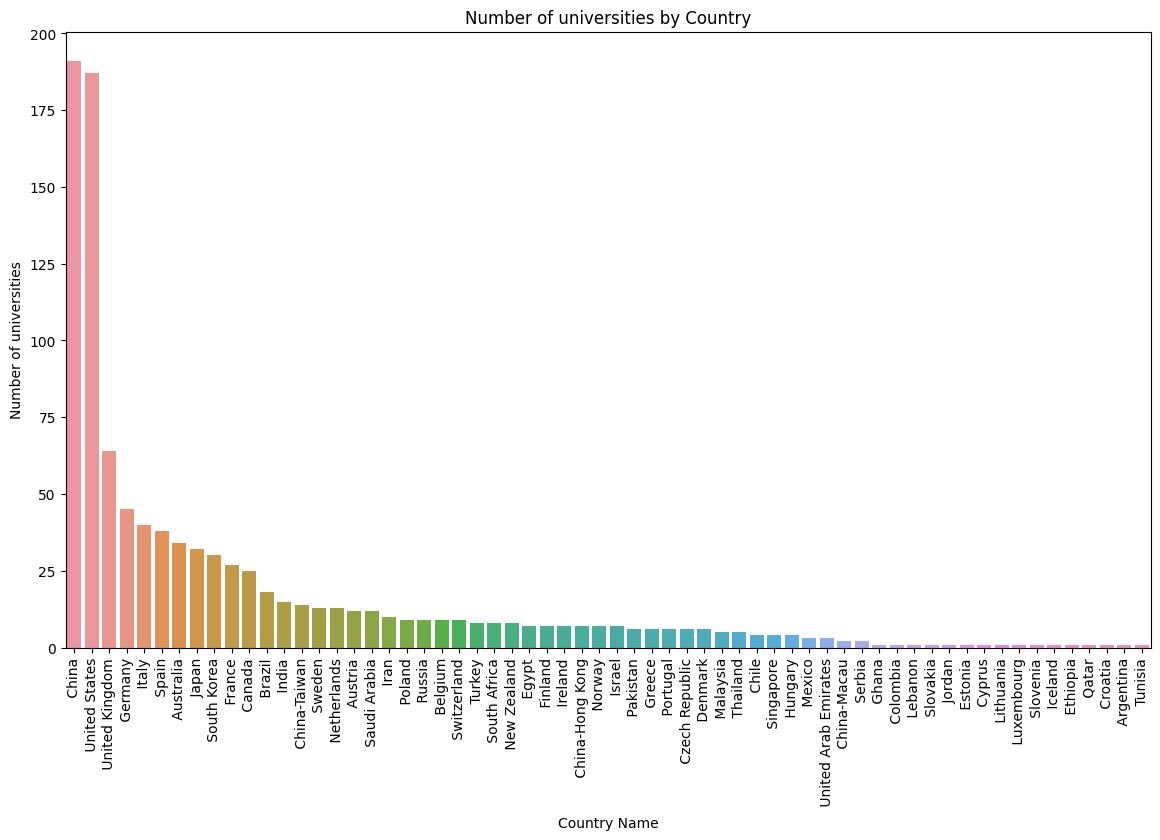

In [167]:
# check outliers
country_counts = shanghai_university_rank23["Country"].value_counts()
#print(country_counts)
plt.figure(figsize=(14 ,8))

c_bar = sns.barplot(x=country_counts.index, y=country_counts.values)
c_bar.set_xticklabels(c_bar.get_xticklabels(), rotation=90)

plt.xlabel("Country Name")
plt.ylabel("Number of universities")
plt.title("Number of universities by Country")

plt.show()

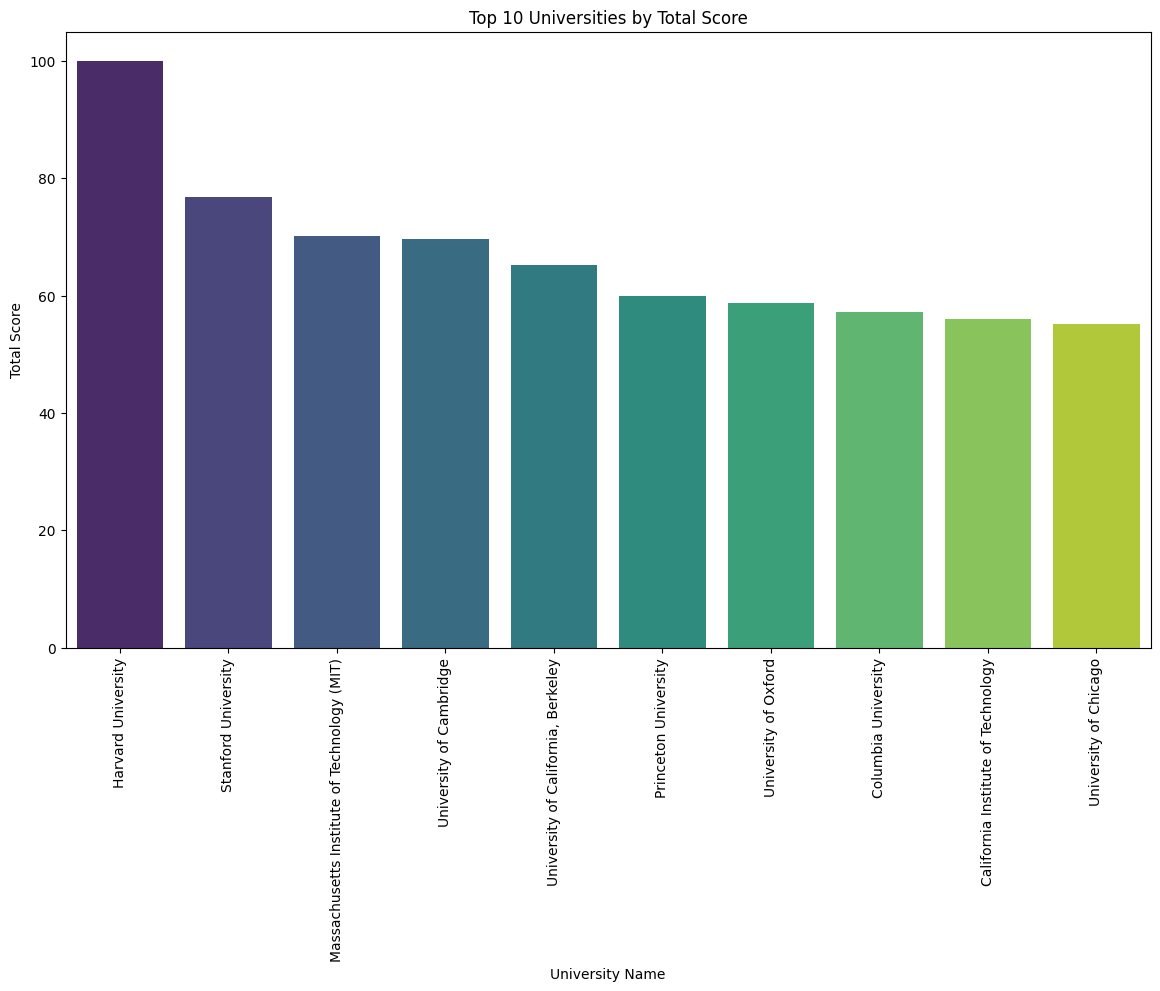

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 universities based on total score
top_universities = shanghai_university_rank22.nlargest(10, "Total Score")

plt.figure(figsize=(14, 8))

# Create bar plot with universities on x-axis and their scores on y-axis
c_bar = sns.barplot(x=top_universities["University Name"], y=top_universities["Total Score"], palette="viridis")

# Rotate x-axis labels for better readability
c_bar.set_xticklabels(c_bar.get_xticklabels(), rotation=90)

# Set labels and title
plt.xlabel("University Name")
plt.ylabel("Total Score")
plt.title("Top 10 Universities by Total Score")

plt.show()


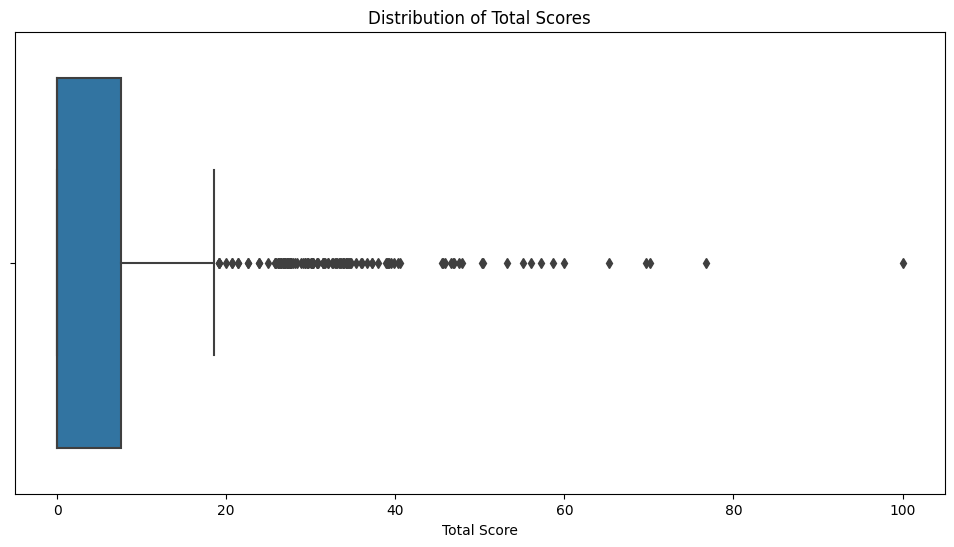

In [169]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Total Score', data=shanghai_university_rank22)
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.show()

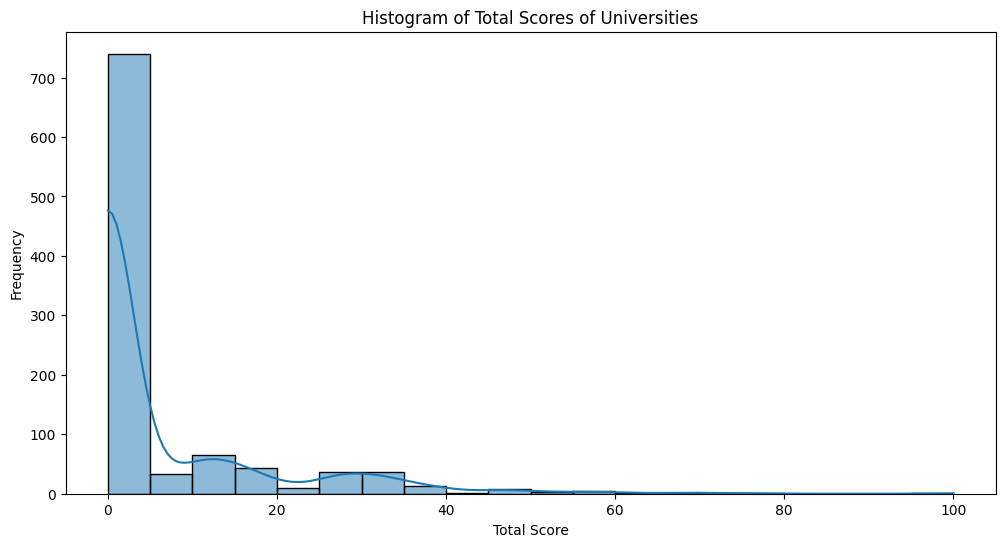

In [170]:
plt.figure(figsize=(12, 6))
sns.histplot(data=shanghai_university_rank22, x='Total Score', bins=20, kde=True)

plt.title('Histogram of Total Scores of Universities')
plt.xlabel('Total Score')
plt.ylabel('Frequency')

plt.show()

# TimesHigherEducation_university_rank 22 - 23

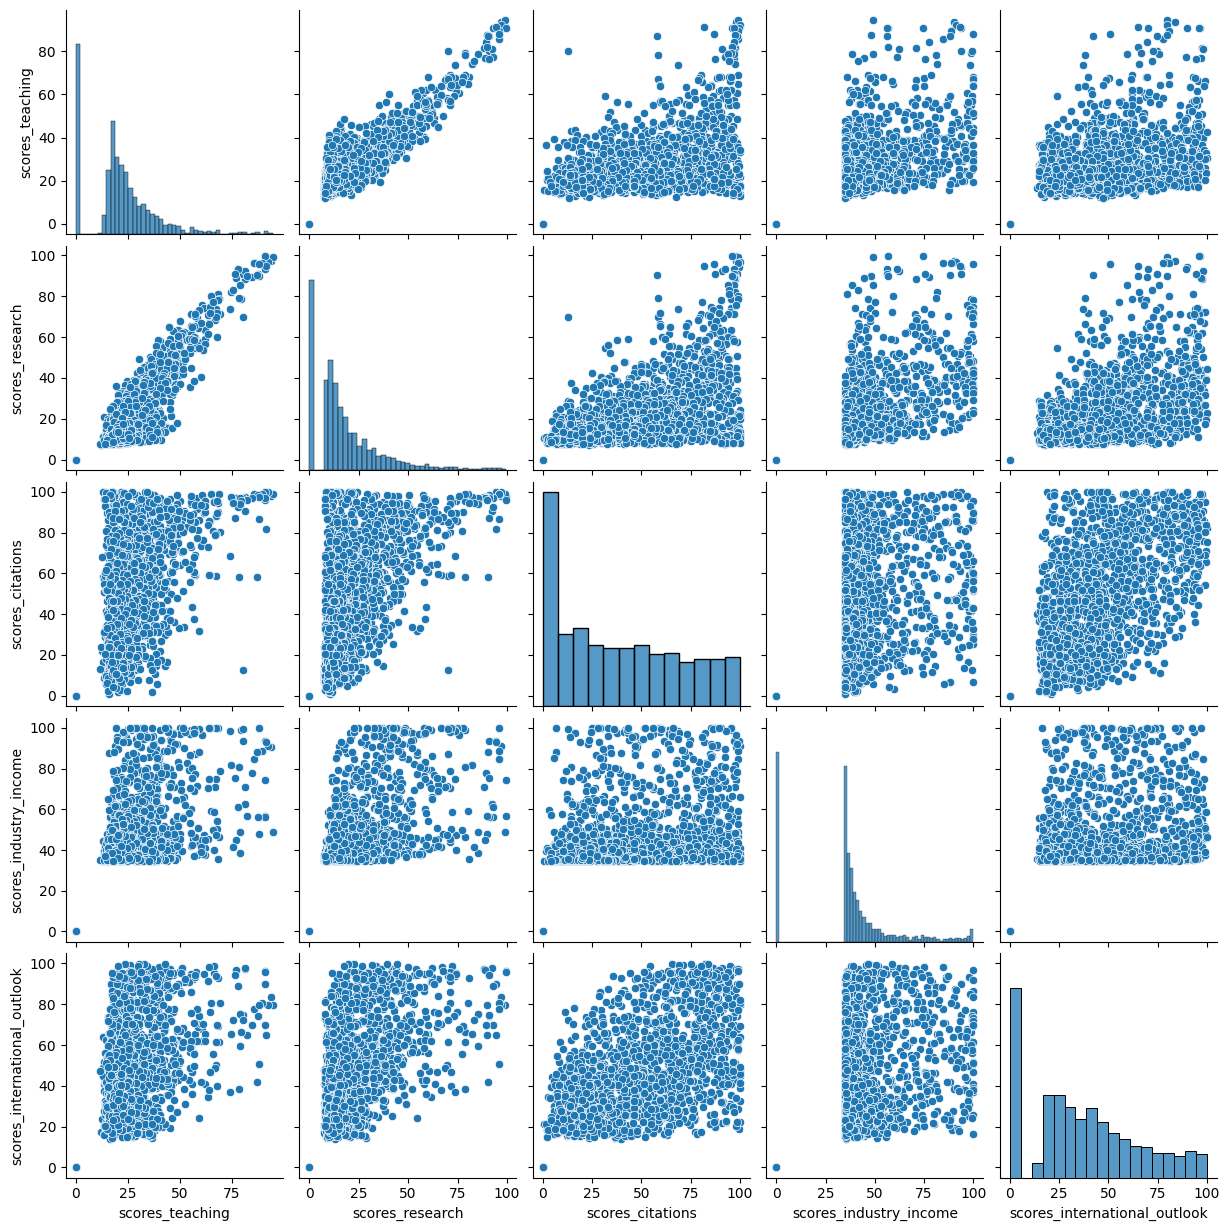

In [196]:
sns.pairplot(TimesHigherEducation_university_rank22[['scores_teaching', 'scores_research', 'scores_citations', 
                 'scores_industry_income', 'scores_international_outlook']])
plt.show()

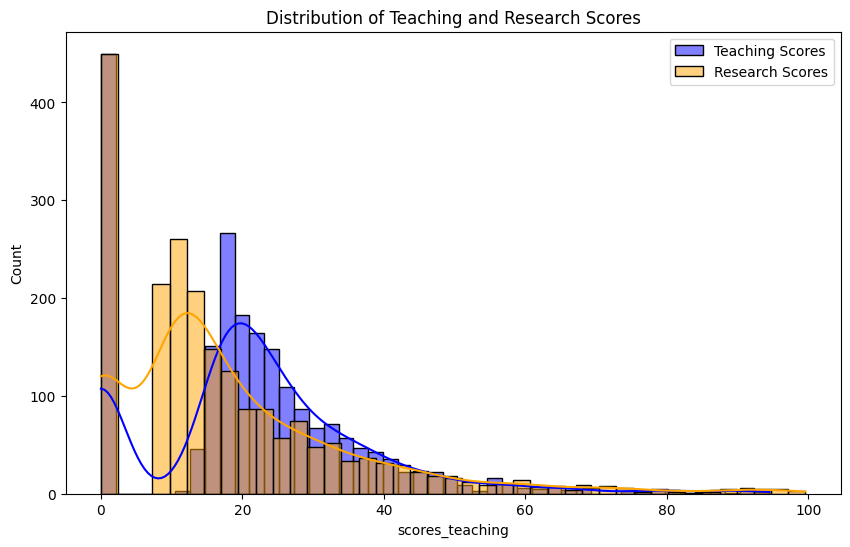

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(TimesHigherEducation_university_rank22['scores_teaching'], kde=True, color='blue', label='Teaching Scores')
sns.histplot(TimesHigherEducation_university_rank22['scores_research'], kde=True, color='orange', label='Research Scores')
plt.title('Distribution of Teaching and Research Scores')
plt.legend()
plt.show()

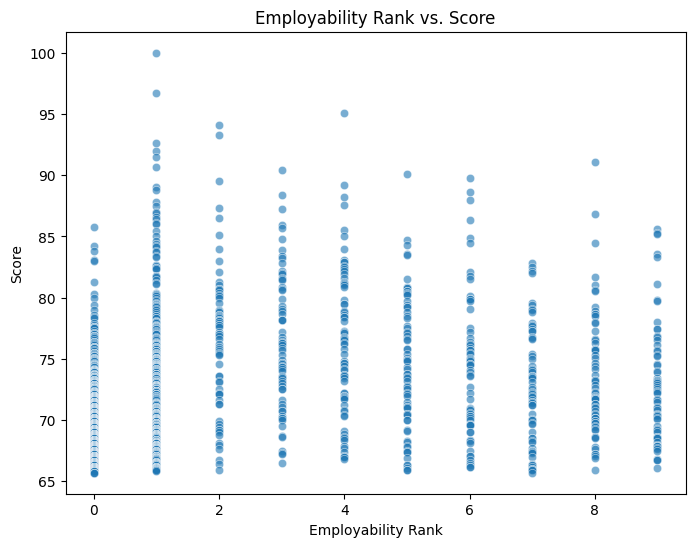

(array([445., 362., 293., 232., 180., 138., 108.,  74.,  54.,  37.,  27.,
         17.,  12.,   8.,   5.,   3.,   2.,   1.,   1.,   1.]),
 array([ 65.7  ,  67.415,  69.13 ,  70.845,  72.56 ,  74.275,  75.99 ,
         77.705,  79.42 ,  81.135,  82.85 ,  84.565,  86.28 ,  87.995,
         89.71 ,  91.425,  93.14 ,  94.855,  96.57 ,  98.285, 100.   ]),
 <BarContainer object of 20 artists>)

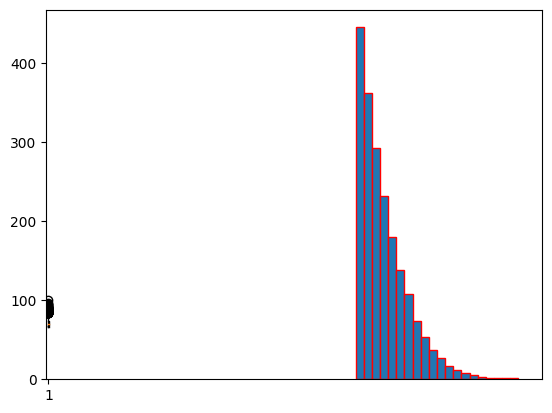

In [204]:
plt.figure(figsize=(8, 6))
WordRank_university_rank22['Employability Rank'] = pd.to_numeric(WordRank_university_rank22['Employability Rank'], errors='coerce')
sns.scatterplot(x='Employability Rank', y='Score', data=WordRank_university_rank22, alpha=0.6)
plt.xlabel("Employability Rank")
plt.ylabel("Score")
plt.title("Employability Rank vs. Score")
plt.show()
plt.boxplot(WordRank_university_rank22['Score'])
plt.hist(WordRank_university_rank22['Score'], bins=20, edgecolor = 'red')

## Q1. Which universities are ranked in the top 10 globally?

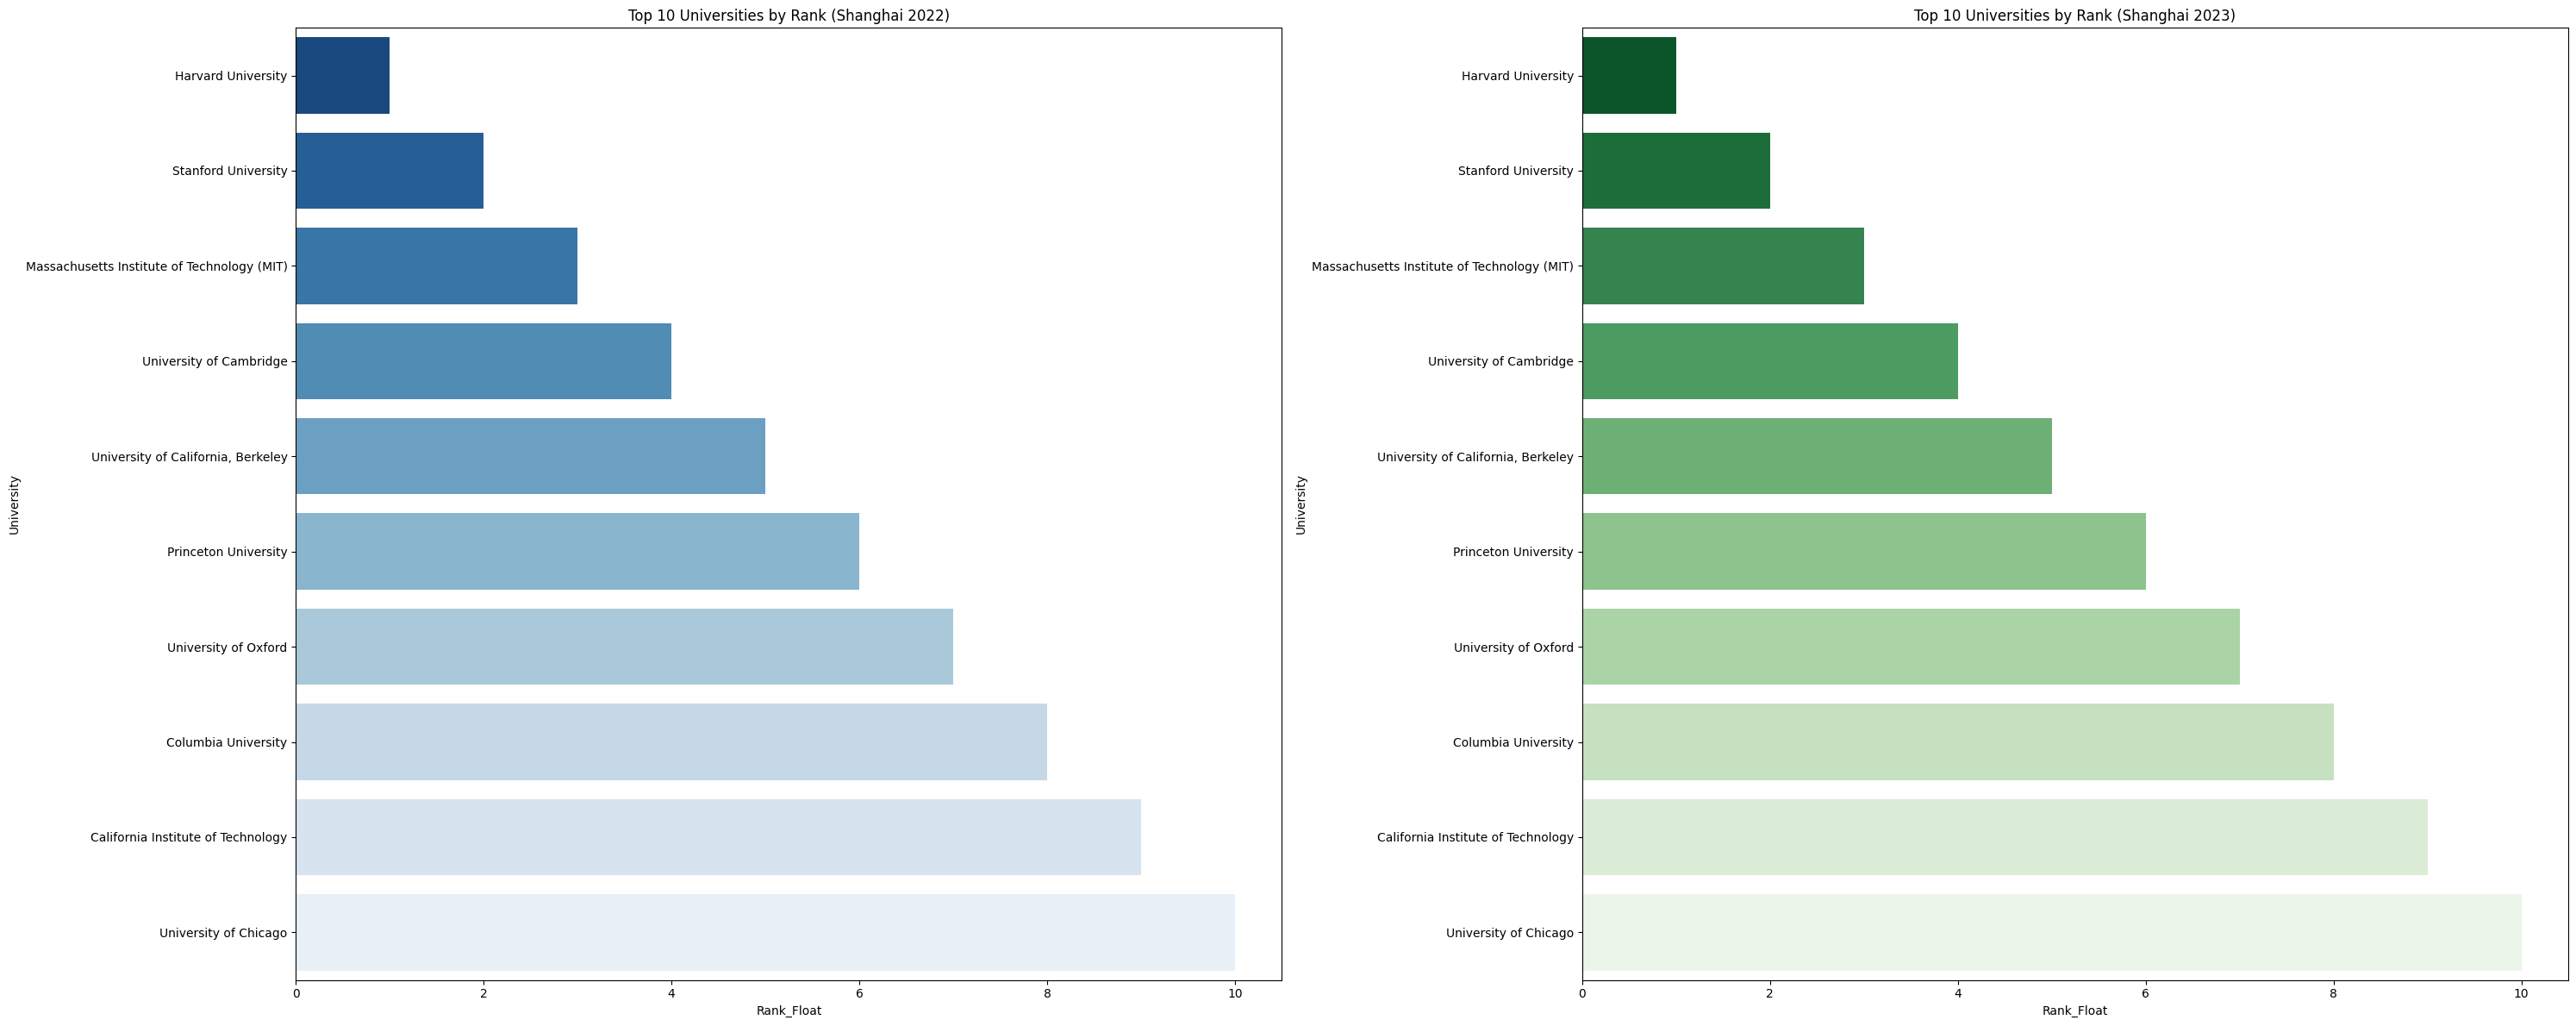

In [296]:
plt.figure(figsize=(30, 12))

# Process 2022 Shanghai Ranking Data
plt.subplot(1, 2, 1)
top_10_shanghai_22 = shanghai_university_rank22[['University Name', 'Rank_Float']].dropna().head(10)
top_10_shanghai_22['Rank_Float'] = top_10_shanghai_22['Rank_Float'].astype(int)
sns.barplot(x='Rank_Float', y='University Name', data=top_10_shanghai_22, palette='Blues_r')
plt.xlabel("Rank_Float")
plt.ylabel("University")
plt.title("Top 10 Universities by Rank (Shanghai 2022)")

# Process 2023 Shanghai Ranking Data
plt.subplot(1, 2, 2)
top_10_shanghai_23 = shanghai_university_rank23[['Name', 'Rank_Float']].dropna().head(10)
top_10_shanghai_23['Rank_Float'] = top_10_shanghai_23['Rank_Float'].astype(int)
sns.barplot(x='Rank_Float', y='Name', data=top_10_shanghai_23, palette='Greens_r')
plt.xlabel("Rank_Float")
plt.ylabel("University")
plt.title("Top 10 Universities by Rank (Shanghai 2023)")

plt.tight_layout()
plt.show()


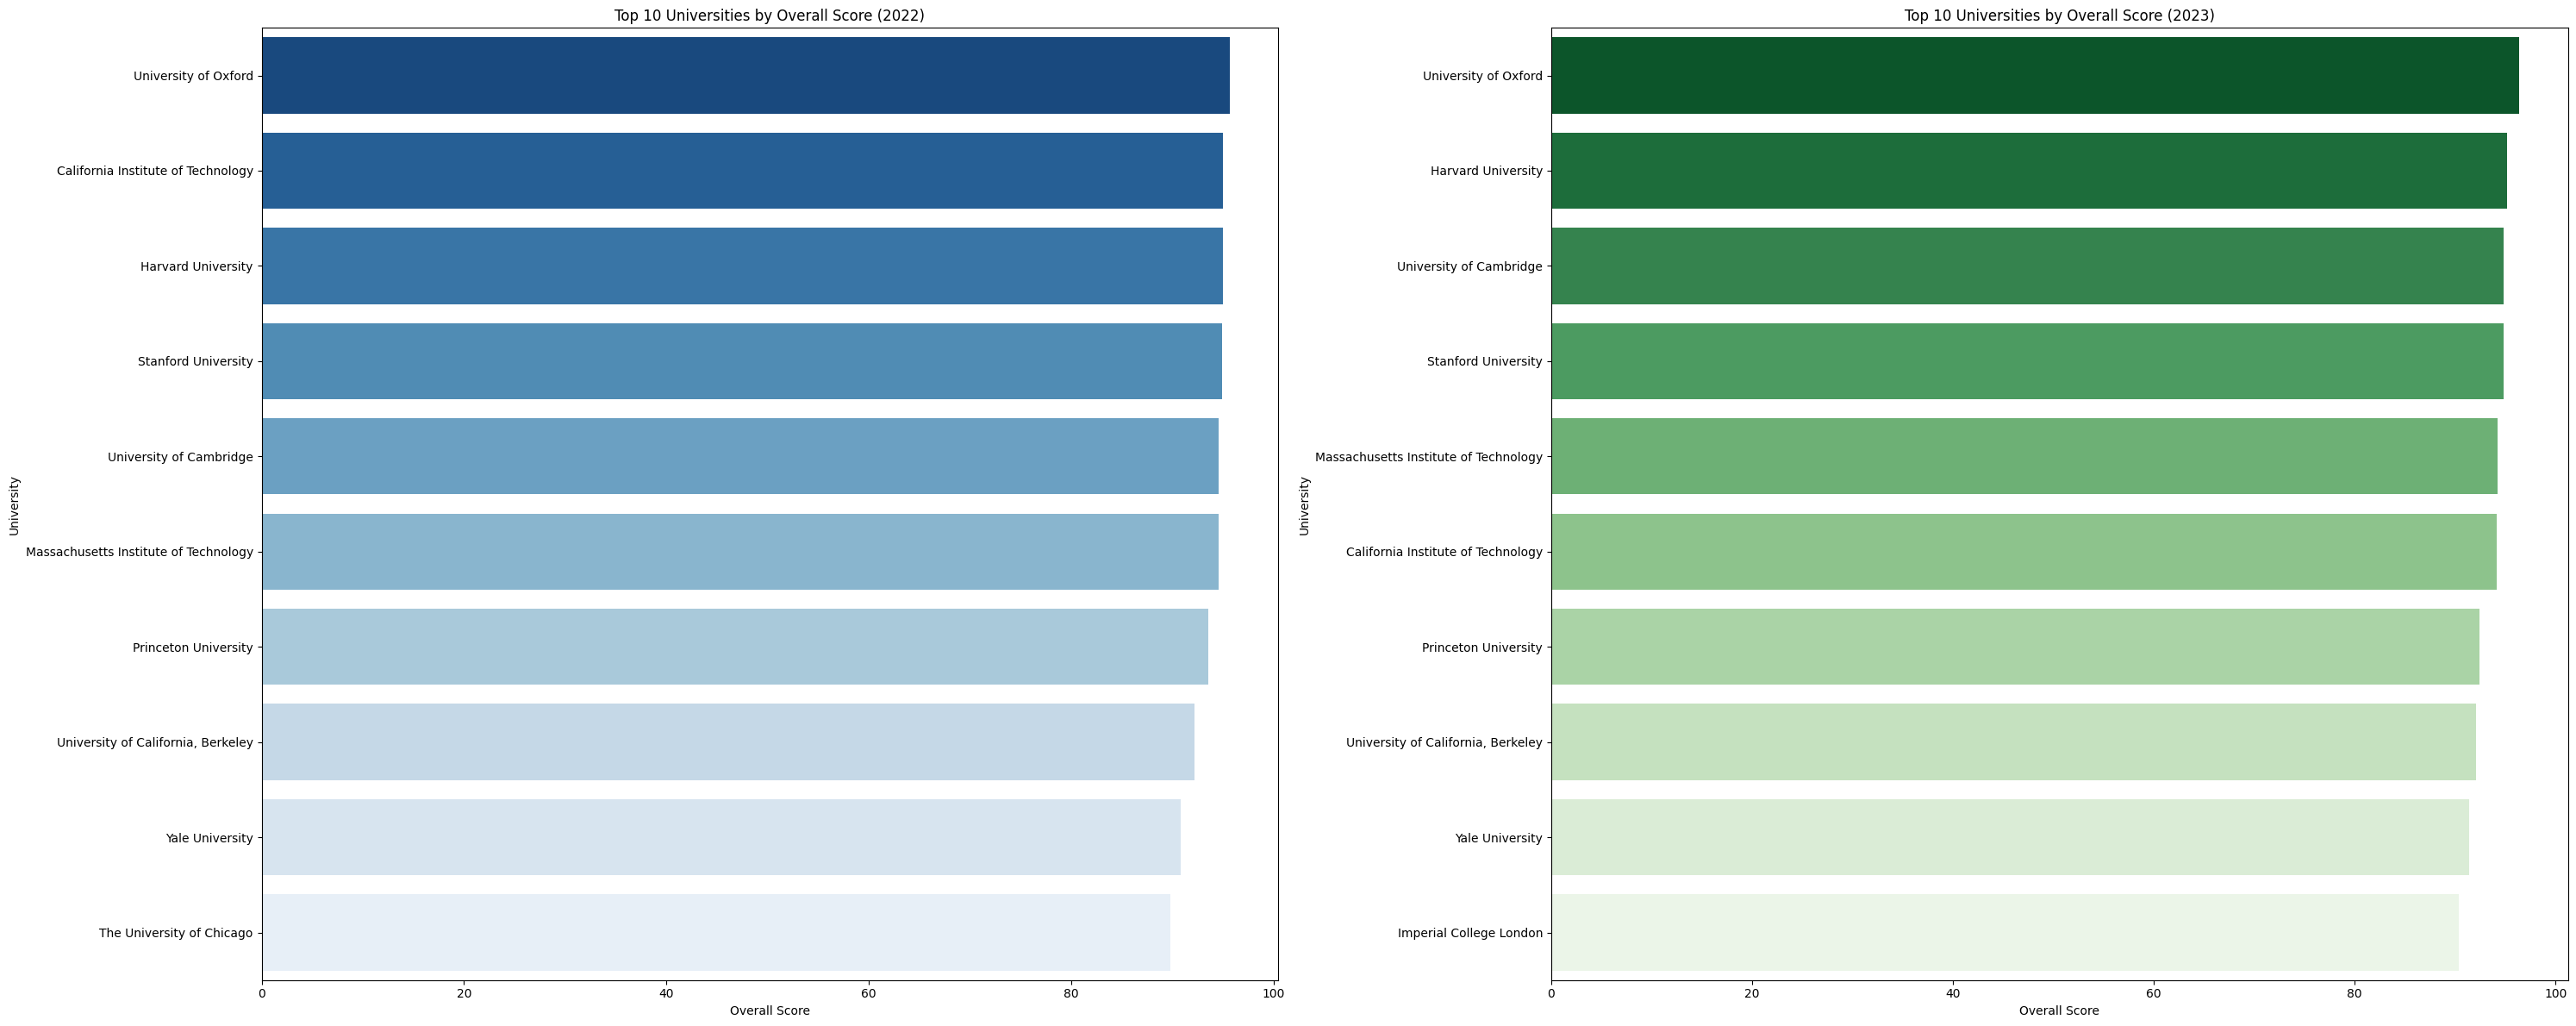

In [195]:
plt.figure(figsize=(30, 12))

# Process 2022 Data
plt.subplot(1, 2, 1)
top_10_22 = TimesHigherEducation_university_rank22[['name', 'scores_overall']].dropna().head(10)
top_10_22['scores_overall'] = top_10_22['scores_overall'].astype(float)
sns.barplot(x='scores_overall', y='name', data=top_10_22, palette='Blues_r')
plt.xlabel("Overall Score")
plt.ylabel("University")
plt.title("Top 10 Universities by Overall Score (2022)")


# Process 2023 Data
plt.subplot(1, 2, 2)
top_10_23 = TimesHigherEducation_university_rank23[['name', 'scores_overall']].dropna().head(10)
top_10_23['scores_overall'] = top_10_23['scores_overall'].astype(float)
sns.barplot(x='scores_overall', y='name', data=top_10_23, palette='Greens_r')
plt.xlabel("Overall Score")
plt.ylabel("University")
plt.title("Top 10 Universities by Overall Score (2023)")

plt.tight_layout()
plt.show()



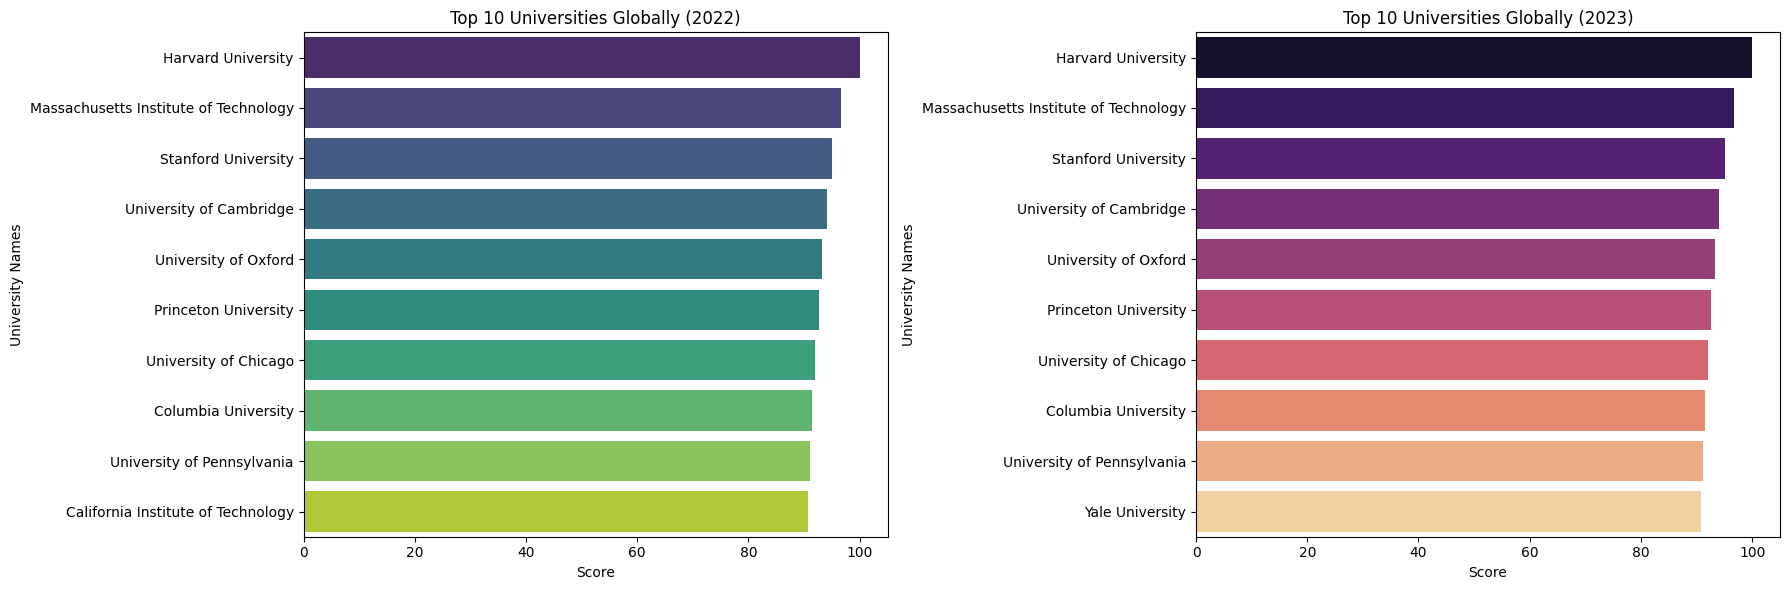

In [215]:
# Global Top 10 Universities for 2022 and 2023
plt.figure(figsize=(18, 6))

# Process 2022 Global Data
plt.subplot(1, 2, 1)
top_10_global_22 = WordRank_university_rank22.sort_values(by='World Rank').head(10)
sns.barplot(x='Score', y='Univesity Names', data=top_10_global_22, palette='viridis')
plt.xlabel("Score")
plt.ylabel("University Names")
plt.title("Top 10 Universities Globally (2022)")

# Process 2023 Global Data
plt.subplot(1, 2, 2)
top_10_global_23 = WordRank_university_rank23.sort_values(by='World Rank').head(10)
sns.barplot(x='Score', y='University Names', data=top_10_global_23, palette='magma')
plt.xlabel("Score")
plt.ylabel("University Names")
plt.title("Top 10 Universities Globally (2023)")
plt.tight_layout()
plt.show()

## Q2. Which universities are ranked in the top 10 for employment outcomes?

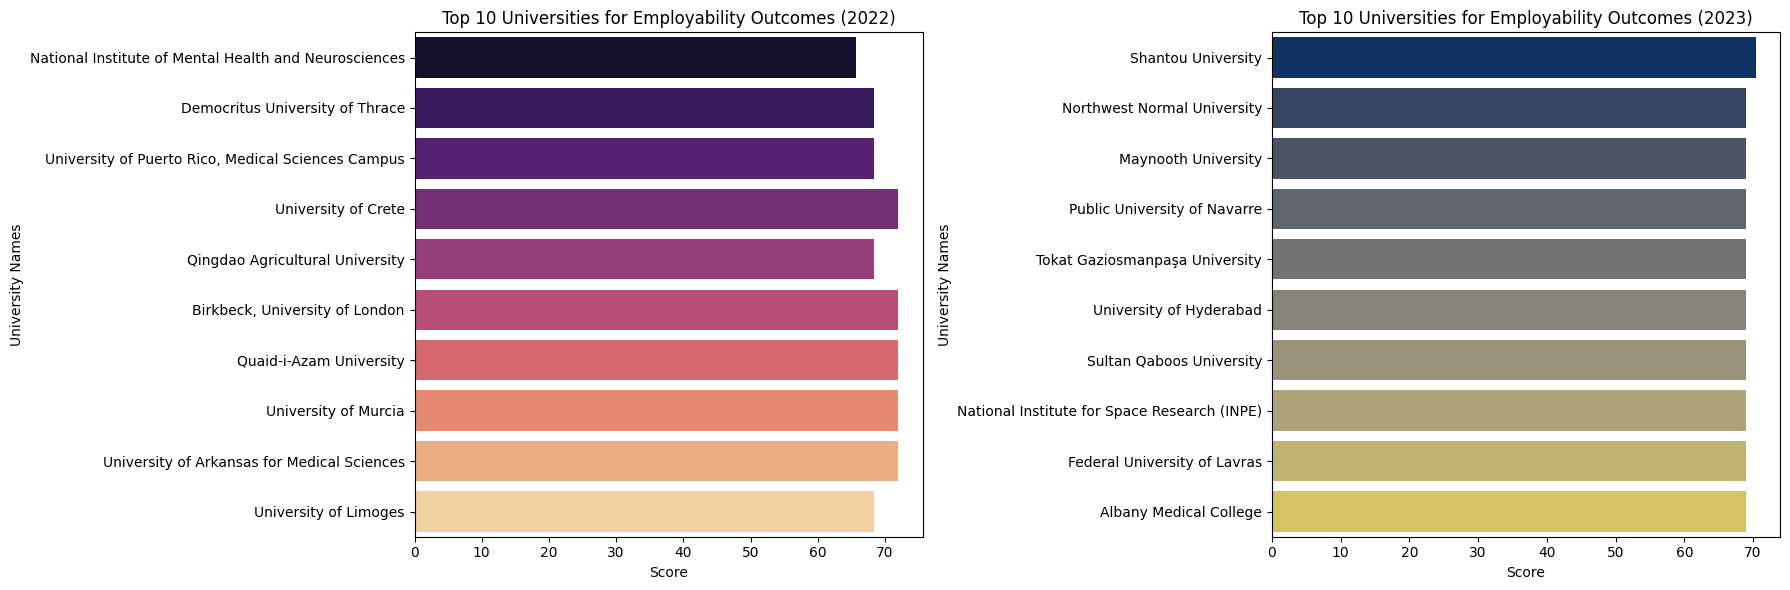

In [223]:
# Employability Top 10 Universities for 2022 and 2023
plt.figure(figsize=(18, 6))

# Process 2022 Employability Data
WordRank_university_rank22['Employability Rank'] = pd.to_numeric(WordRank_university_rank22['Employability Rank'], errors='coerce')
top_10_employability_22 = WordRank_university_rank22.sort_values(by='Employability Rank').head(10)
plt.subplot(1, 2, 1)
sns.barplot(x='Score', y='Univesity Names', data=top_10_employability_22, palette='magma')
plt.xlabel("Score")
plt.ylabel("University Names")
plt.title("Top 10 Universities for Employability Outcomes (2022)")

# Process 2023 Employability Data
WordRank_university_rank23['Employability Rank'] = pd.to_numeric(WordRank_university_rank23['Employability Rank'], errors='coerce')
top_10_employability_23 = WordRank_university_rank23.sort_values(by='Employability Rank').head(10)
plt.subplot(1, 2, 2)
sns.barplot(x='Score', y='University Names', data=top_10_employability_23, palette='cividis')
plt.xlabel("Score")
plt.ylabel('University Names')
plt.title("Top 10 Universities for Employability Outcomes (2023)")

plt.tight_layout()
plt.show()

## Q3. What positions do universities in Saudi Arabia hold within the global rankings?


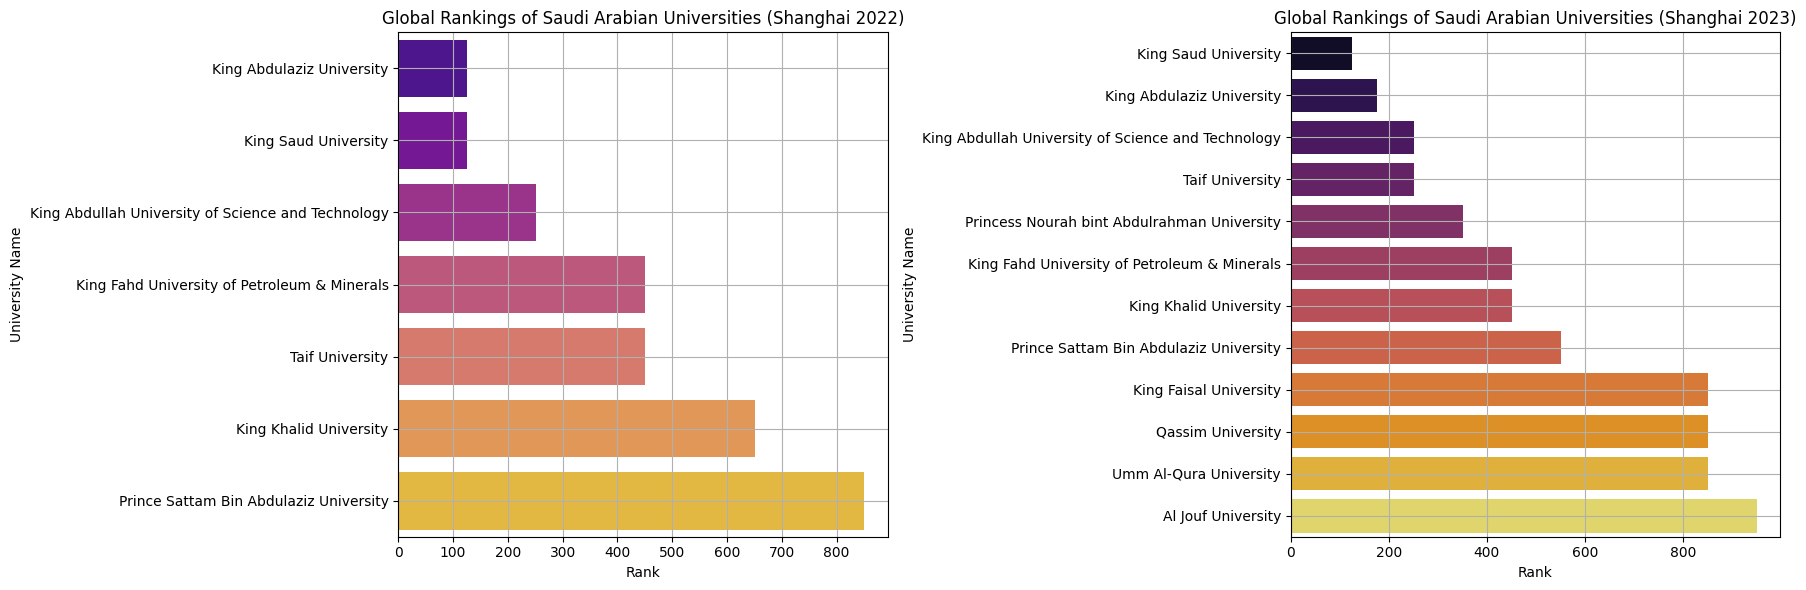

In [292]:
plt.figure(figsize=(18, 6))


# Process 2022 Saudi Universities Data
plt.subplot(1, 2, 1)
saudi_universities_22 = shanghai_university_rank22[shanghai_university_rank22['Country'] == ' Saudi Arabia'].sort_values(by='Rank')
sns.barplot(x= 'Rank_Float', y='University Name', data=saudi_universities_22, palette='plasma')
plt.grid()
plt.xlabel("Rank")
plt.ylabel("University Name")
plt.title("Global Rankings of Saudi Arabian Universities (Shanghai 2022)")

# Process 2023 Saudi Universities Data
plt.subplot(1, 2, 2)
saudi_universities_23 = shanghai_university_rank23[shanghai_university_rank23['Country'] == ' Saudi Arabia'].sort_values(by='Rank')
sns.barplot(x='Rank_Float', y='Name', data=saudi_universities_23, palette='inferno')
plt.grid()
plt.xlabel("Rank")
plt.ylabel("University Name")
plt.title("Global Rankings of Saudi Arabian Universities (Shanghai 2023)")

plt.tight_layout()
plt.show()



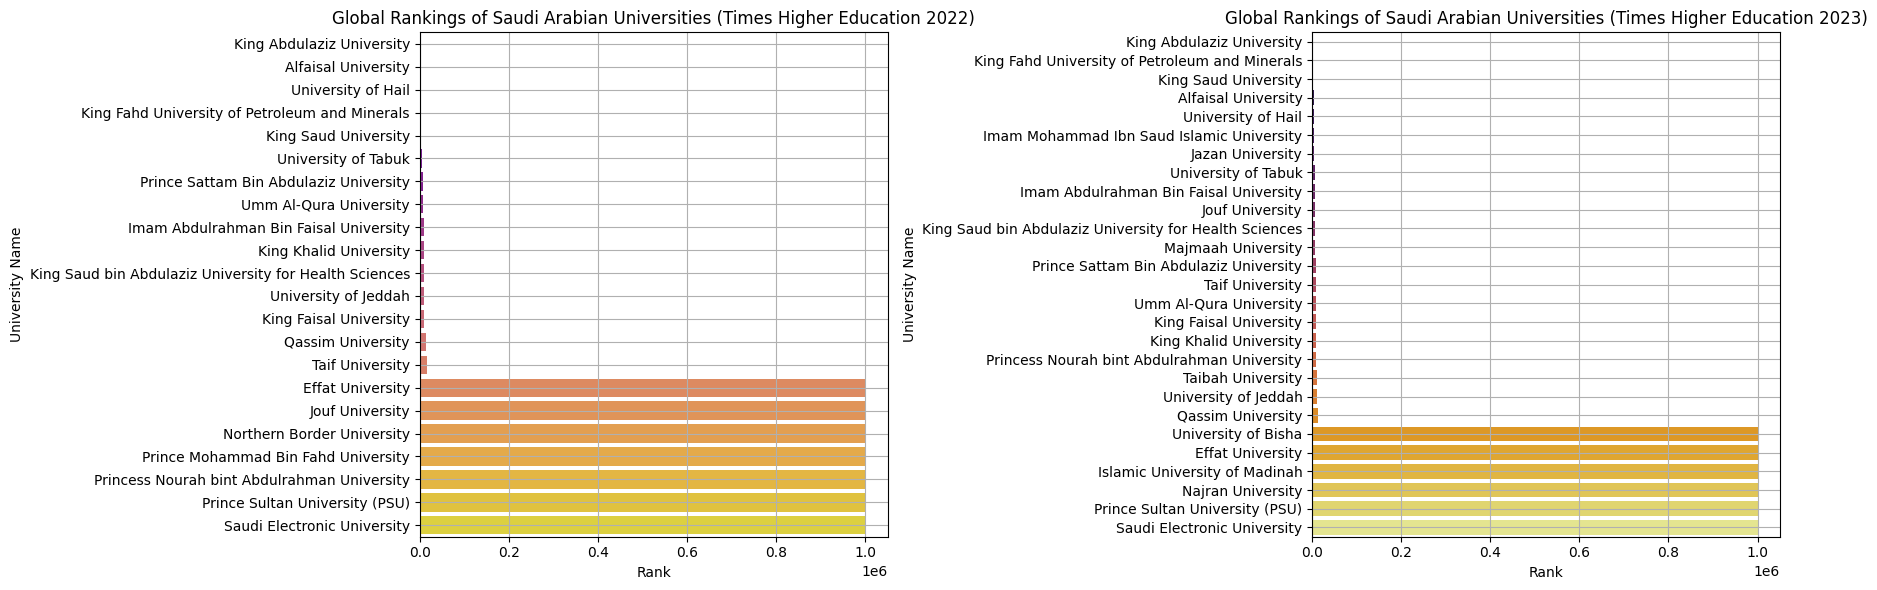

In [305]:
plt.figure(figsize=(18, 6))

# Process 2022 Saudi Universities Data
plt.subplot(1, 2, 1)
saudi_universities_22 = TimesHigherEducation_university_rank22[TimesHigherEducation_university_rank22['location'] == 'Saudi Arabia'].sort_values(by='rank_order')
sns.barplot(x='rank_order', y='name', data=saudi_universities_22, palette='plasma')
plt.grid()
plt.xlabel("Rank")
plt.ylabel("University Name")
plt.title("Global Rankings of Saudi Arabian Universities (Times Higher Education 2022)")

# Process 2023 Saudi Universities Data
plt.subplot(1, 2, 2)
saudi_universities_23 = TimesHigherEducation_university_rank23[TimesHigherEducation_university_rank23['location'] == 'Saudi Arabia'].sort_values(by='rank_order')
sns.barplot(x='rank_order', y='name', data=saudi_universities_23, palette='inferno')
plt.grid()
plt.xlabel("Rank")
plt.ylabel("University Name")
plt.title("Global Rankings of Saudi Arabian Universities (Times Higher Education 2023)")

plt.tight_layout()
plt.show()


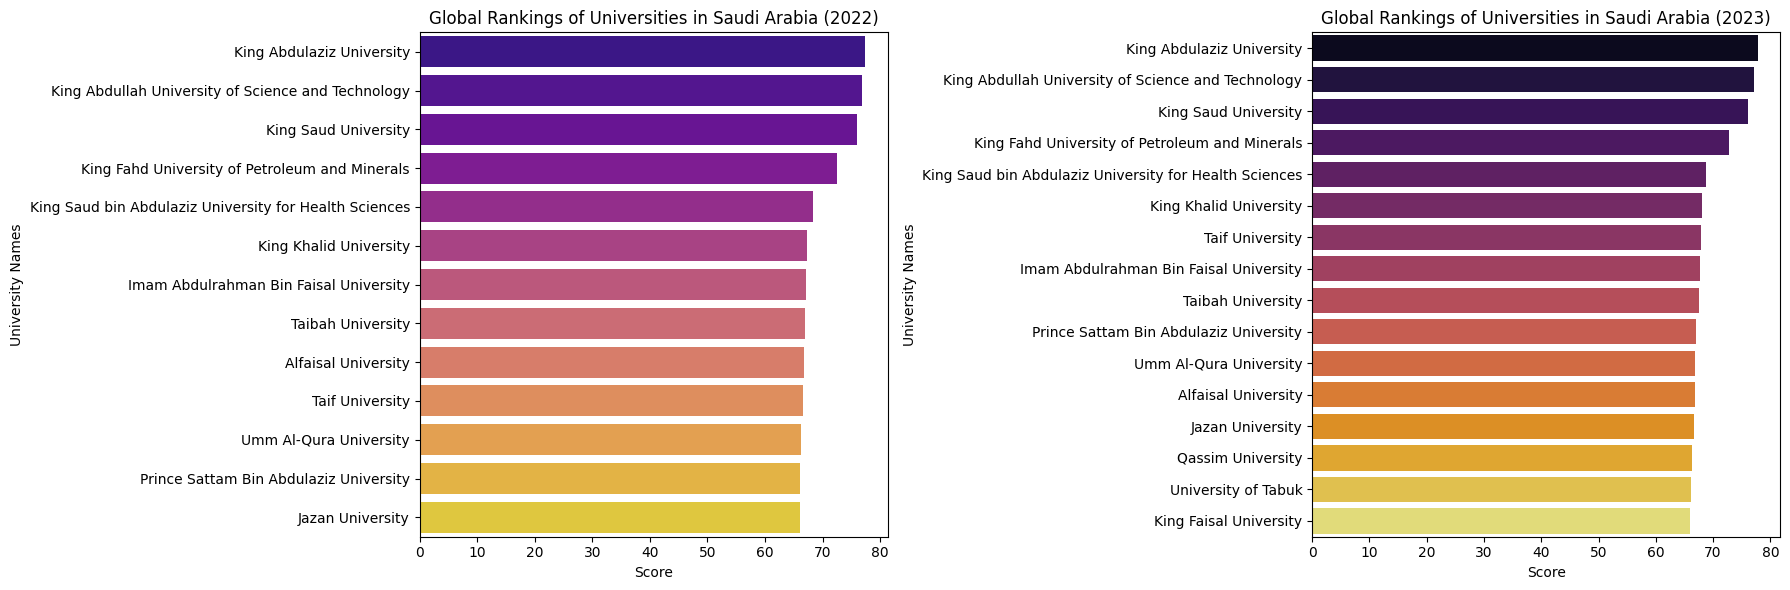

In [295]:
# Saudi Arabian Universities Global Rankings
plt.figure(figsize=(18, 6))

# Process 2022 Saudi Universities Data
plt.subplot(1, 2, 1)
saudi_universities_22 = WordRank_university_rank22[WordRank_university_rank22['Location'] == 'Saudi Arabia'].sort_values(by='World Rank')
sns.barplot(x='Score', y='Univesity Names', data=saudi_universities_22, palette='plasma')
plt.xlabel("Score")
plt.ylabel("University Names")
plt.title("Global Rankings of Universities in Saudi Arabia (2022)")

# Process 2023 Saudi Universities Data
plt.subplot(1, 2, 2)
saudi_universities_23 = WordRank_university_rank23[WordRank_university_rank23['Location'] == 'Saudi Arabia'].sort_values(by='World Rank')
sns.barplot(x='Score', y='University Names', data=saudi_universities_23, palette='inferno')
plt.xlabel("Score")
plt.ylabel("University Names")
plt.title("Global Rankings of Universities in Saudi Arabia (2023)")

plt.tight_layout()
plt.show()

## Q4. Considering various factors such as employment rankings, researchrankings, and others, which has the most significant impact on auniversity's overall ranking?

C:\Users\sulta\AppData\Local\Temp\ipykernel_23400\2921163177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors_22[col] = pd.to_numeric(factors_22[col], errors='coerce')
C:\Users\sulta\AppData\Local\Temp\ipykernel_23400\2921163177.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors_23[col] = pd.to_numeric(factors_23[col], errors='coerce')


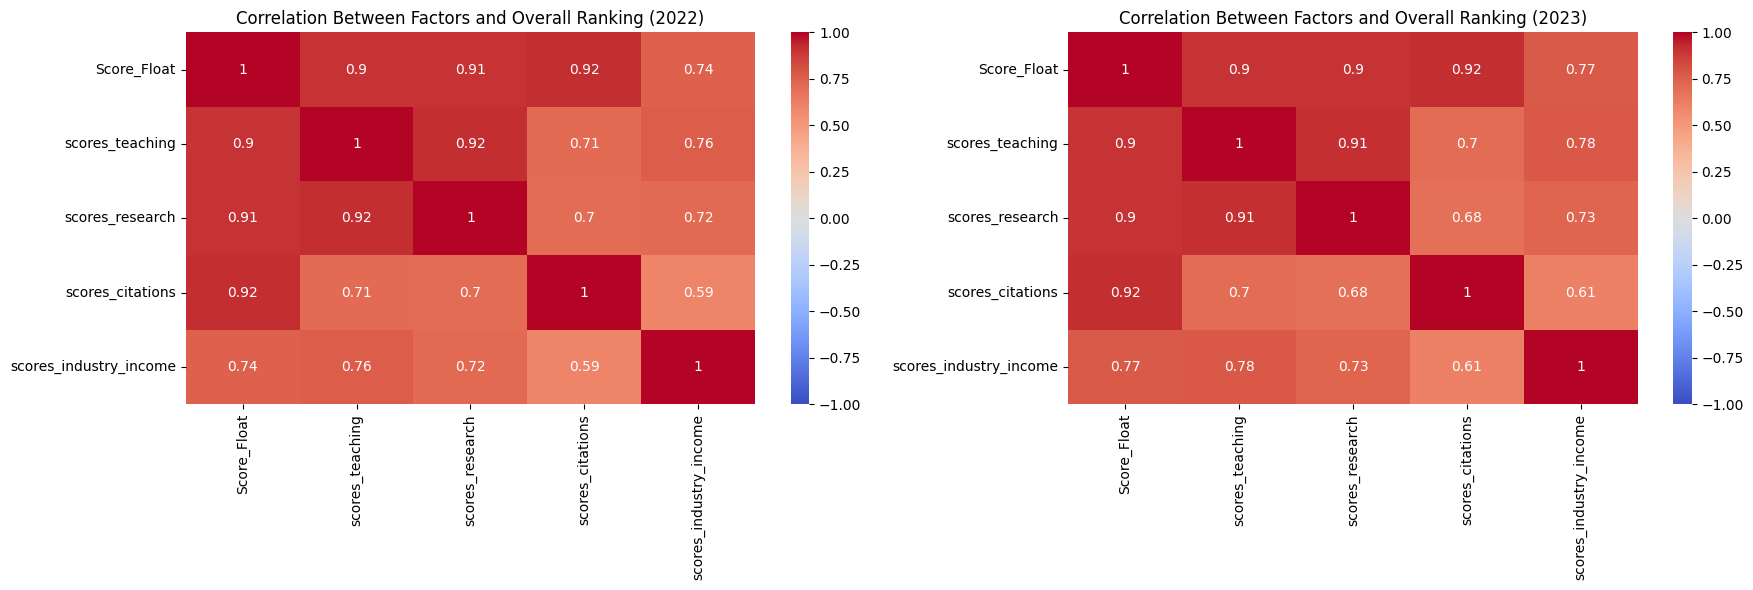

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Factors affecting university rankings for 2022
factors_22 = TimesHigherEducation_university_rank22[['Score_Float', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income']]
for col in factors_22.columns[1:]:
    factors_22[col] = pd.to_numeric(factors_22[col], errors='coerce')
corr_22 = factors_22.corr()

# Factors affecting university rankings for 2023
factors_23 = TimesHigherEducation_university_rank23[['Score_Float', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income']]
for col in factors_23.columns[1:]:
    factors_23[col] = pd.to_numeric(factors_23[col], errors='coerce')
corr_23 = factors_23.corr()

# Create heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.heatmap(corr_22, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Factors and Overall Ranking (2022)')

plt.subplot(1, 2, 2)
sns.heatmap(corr_23, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Factors and Overall Ranking (2023)')

plt.tight_layout()
plt.show()


C:\Users\sulta\AppData\Local\Temp\ipykernel_23400\1536732681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors_22[col] = pd.to_numeric(factors_22[col], errors='coerce')
C:\Users\sulta\AppData\Local\Temp\ipykernel_23400\1536732681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors_23[col] = pd.to_numeric(factors_23[col], errors='coerce')


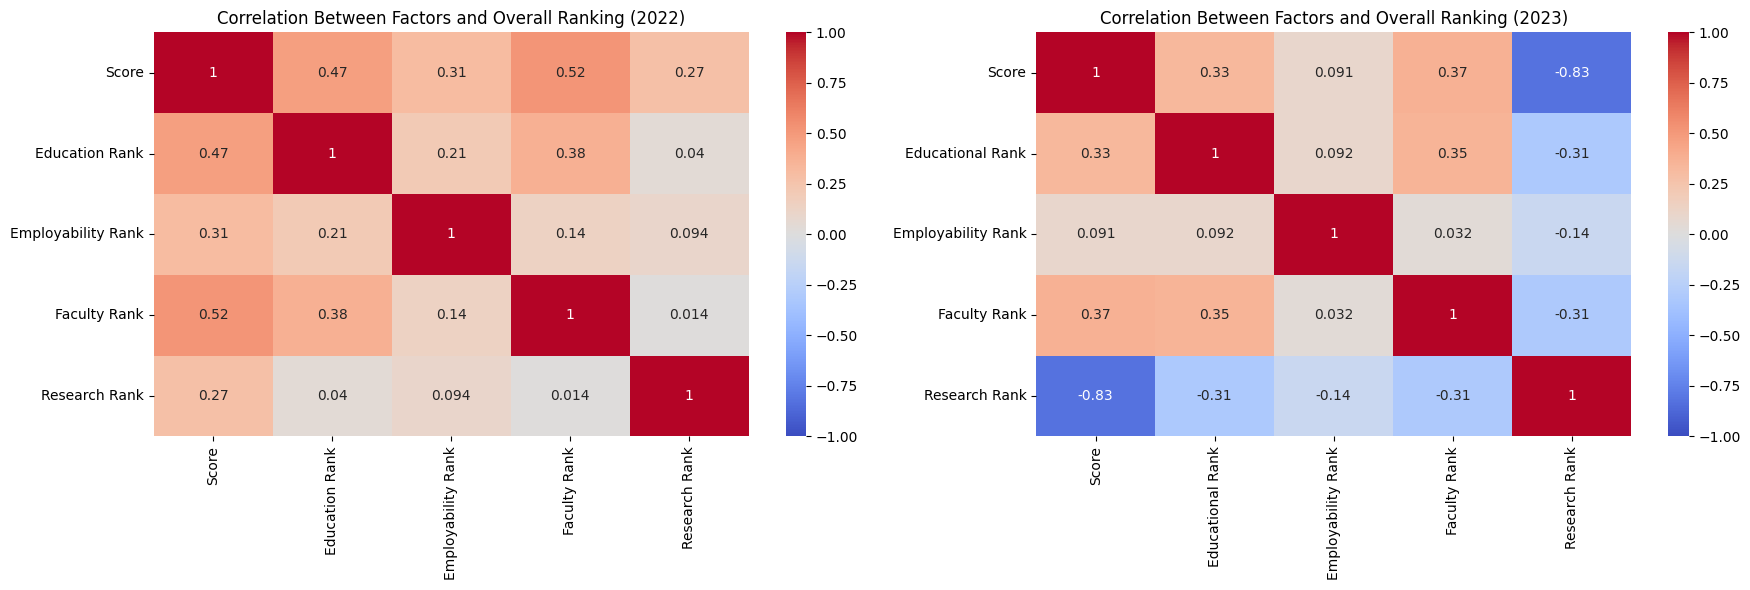

In [238]:
# Factors affecting university rankings for 2022
factors_22 = WordRank_university_rank22[['Score', 'Education Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank']]
for col in factors_22.columns[1:]:
    factors_22[col] = pd.to_numeric(factors_22[col], errors='coerce')
corr_22 = factors_22.corr()

# Factors affecting university rankings for 2023
factors_23 = WordRank_university_rank23[['Score', 'Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank']]
for col in factors_23.columns[1:]:
    factors_23[col] = pd.to_numeric(factors_23[col], errors='coerce')
corr_23 = factors_23.corr()

# Create heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.heatmap(corr_22, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Factors and Overall Ranking (2022)')

plt.subplot(1, 2, 2)
sns.heatmap(corr_23, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Factors and Overall Ranking (2023)')

plt.tight_layout()
plt.show()
# WordRank_university_rank23['']

## Q5. Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?


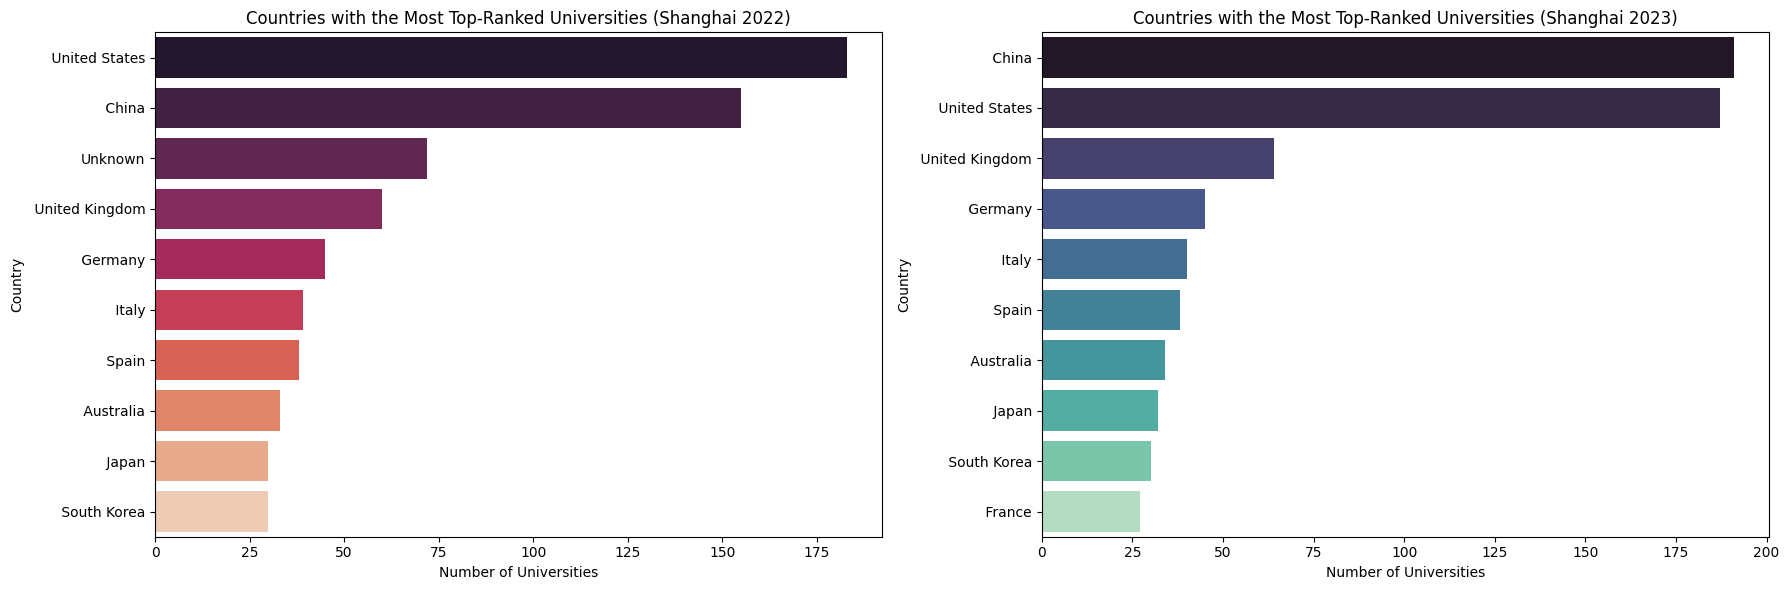

In [275]:
plt.figure(figsize=(18, 6))

# Process 2022 Data
plt.subplot(1, 2, 1)
top_countries_22 = shanghai_university_rank22['Country'].value_counts().head(10)
sns.barplot(x=top_countries_22.values, y=top_countries_22.index, palette='rocket')
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.title("Countries with the Most Top-Ranked Universities (Shanghai 2022)")

# Process 2023 Data
plt.subplot(1, 2, 2)
top_countries_23 = shanghai_university_rank23['Country'].value_counts().head(10)
sns.barplot(x=top_countries_23.values, y=top_countries_23.index, palette='mako')
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.title("Countries with the Most Top-Ranked Universities (Shanghai 2023)")

plt.tight_layout()
plt.show()


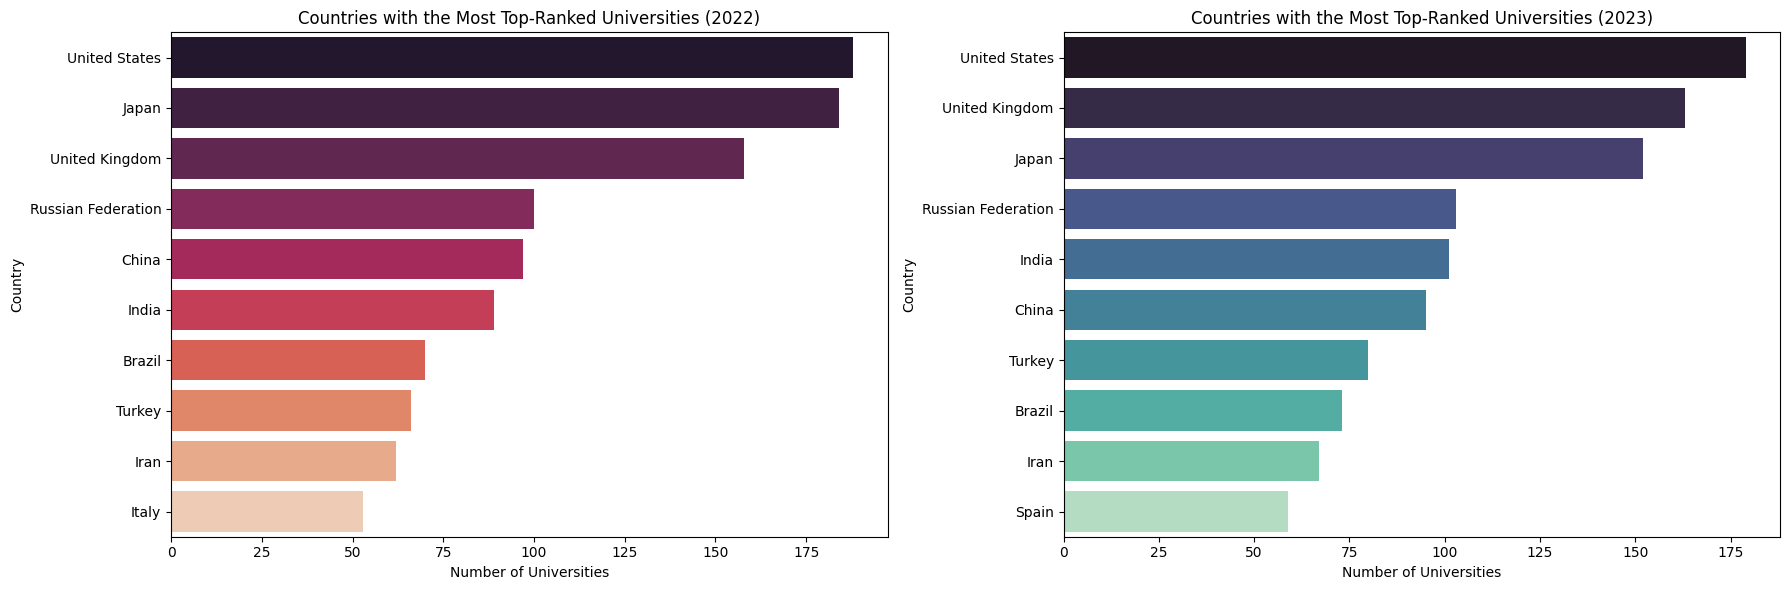

In [332]:
# Top 10 Countries with Most Top-Ranked Universities for 2022 and 2023
plt.figure(figsize=(18, 6))

# Process 2022 Data
plt.subplot(1, 2, 1)
top_countries_22 = TimesHigherEducation_university_rank22['location'].value_counts().head(10)
sns.barplot(x=top_countries_22.values, y=top_countries_22.index, palette='rocket')
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.title("Countries with the Most Top-Ranked Universities (2022)")

# Process 2023 Data
plt.subplot(1, 2, 2)
top_countries_23 = TimesHigherEducation_university_rank23['location'].value_counts().head(10)
sns.barplot(x=top_countries_23.values, y=top_countries_23.index, palette='mako')
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.title("Countries with the Most Top-Ranked Universities (2023)")

plt.tight_layout()
plt.show()


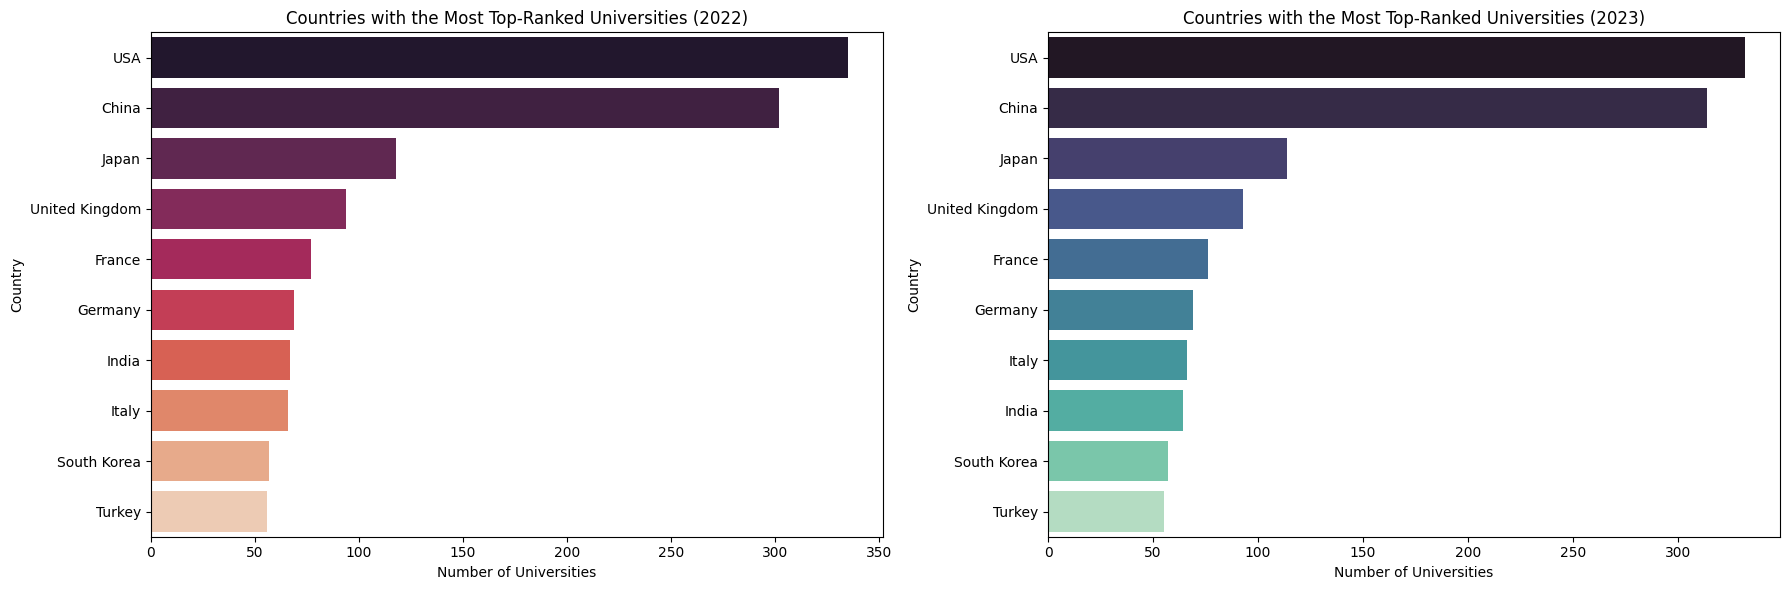

In [235]:
# Top 10 Countries with Most Top-Ranked Universities for 2022 and 2023
plt.figure(figsize=(18, 6))

# Process 2022 Data
plt.subplot(1, 2, 1)
top_countries_22 = WordRank_university_rank22['Location'].value_counts().head(10)
sns.barplot(x=top_countries_22.values, y=top_countries_22.index, palette='rocket')
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.title("Countries with the Most Top-Ranked Universities (2022)")

# Process 2023 Data
plt.subplot(1, 2, 2)
top_countries_23 = WordRank_university_rank23['Location'].value_counts().head(10)
sns.barplot(x=top_countries_23.values, y=top_countries_23.index, palette='mako')
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.title("Countries with the Most Top-Ranked Universities (2023)")

plt.tight_layout()
plt.show()

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [171]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [172]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [243]:


# Extract university names
names_22 = set(shanghai_university_rank22['University Name'].str.strip().str.lower())
names_23 = set(shanghai_university_rank23['Name'].str.strip().str.lower())

# Find differences
only_in_22 = names_22 - names_23
only_in_23 = names_23 - names_22
common_universities = names_22 & names_23

# Display results
print(f"Number of universities in 2022 dataset: {len(names_22)}")
print(f"Number of universities in 2023 dataset: {len(names_23)}")
print(f"Common universities: {len(common_universities)}")
print(f"Universities only in 2022 dataset: {len(only_in_22)}")
print(f"Universities only in 2023 dataset: {len(only_in_23)}")

# Optional: Display a few differences
print("\nSome universities only in 2022 dataset:", list(only_in_22)[:5])
print("Some universities only in 2023 dataset:", list(only_in_23)[:5])


Number of universities in 2022 dataset: 1000
Number of universities in 2023 dataset: 1000
Common universities: 928
Universities only in 2022 dataset: 72
Universities only in 2023 dataset: 72

Some universities only in 2022 dataset: ['university of south bohemia', 'university of salento', 'university of ulster', 'mashhad university medical science', 'university of the free state', 'warsaw university of life sciences', 'university paris est creteil', 'ton duc thang university', 'university of montana - missoula', 'federal university of rio grande do norte', 'national cheng kung university', 'amity university', 'tuscia university', 'lehigh university', 'university of mississippi', 'middle east technical university', 'illinois institute of technology', 'university of rennes 1', 'florida atlantic university', 'monterrey institute of technology and higher education', 'national university of la plata', 'wroclaw university of science and technology', 'technical university of dortmund', 'portla

In [173]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [174]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [175]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.